# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Cвойства и сравнение оценок

In [ ]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [ ]:
np.random.seed(42)

**Условие задания**: Аспект-Император трёх морей Анасуримбор Келлхус спустя 20 лет с момента объединения Новой Империи объявляет начало Великой Ордалии --- похода против крепости Голготтерат. Поход займёт более, чем пол года путешествия сквозь безжизненные населённые дикими монстрами пустоши, в связи с чем Келлхус отдаёт приказ всем провинциям выдать провизию для похода, а имперским математикам, коим принадлежите Вы --- сосчитать, каждый ли правитель провинции выполнил приказ качественно.

В этой практике Вам придётся оценить число материальных ресурсов, предоставленных каждой из тысячи провинций, лучшим образом и предоставить отчёт, чему равно мат. ожидание числа ресурсов и почему Ваш способ оценивания хорош. Будем надеяться, что в среднем все короли добросовестно выполнили приказ.

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

### Задача 1

Известно, что количество урожая каждой Нансурской провинции в год подчиняется распределению $U[0, 2]$ в тоннах. Некоторые короли решают оставить существенную часть урожая, мимикрируя под $U[0, \theta]$ для $\theta < 2$. Нужно предложить метод оценки $\theta$. Если значение оценки будет меньше 2, приказ будет считаться невыполненным.

Сгенерируйте N выборок $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [ ]:
N = 1e4  # use this
N = int(N)
sp = []
for j in range(5, 15):
  tetta = j / 10
  sp.append(sps.uniform(loc=0, scale=tetta).rvs(size=(N, N // 2)))
sp = np.array(sp)
n = 5000

In [ ]:
sp.shape

(10, 10000, 5000)

Для всех $N$ выборок посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

При помощи моделирования выясните, какие оценки точнее, чем другие. Для этого постройте для разных $\theta$ распределение каждой из оценок. Какая оценка предпочтительнее? Почему? Как это согласуется с принципом среднеквадратичного подхода к сравнению оценок? Посчитайте точный и эмпирический риск каждой из них: $\hat{R}_{\theta}(\theta^*, \theta) = \frac{1}{n}\sum (\theta^*(S) - \theta)^2$, где $S$ это выборка и сравните их. Верны ли условия теоремы Рао-Крамера для данного семейства распределений? Существует ли эффективная оценка для равномерного распределения? Сделайте выводы о том, как эмпирический риск связан с теоретическим.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [ ]:
first_estimation = 2 * np.mean(sp, axis = 2)
second_estimation = np.mean(sp, axis = 2) + np.max(sp, axis = 2) / 2
third_estimation = (n + 1) * np.min(sp, axis = 2)
fourth_estimation = np.min(sp, axis = 2) + np.max(sp, axis = 2)
fifth_estimation = (n + 1) / n * np.max(sp, axis = 2)
all_estimations = np.array([first_estimation, second_estimation, third_estimation, fourth_estimation, fifth_estimation])

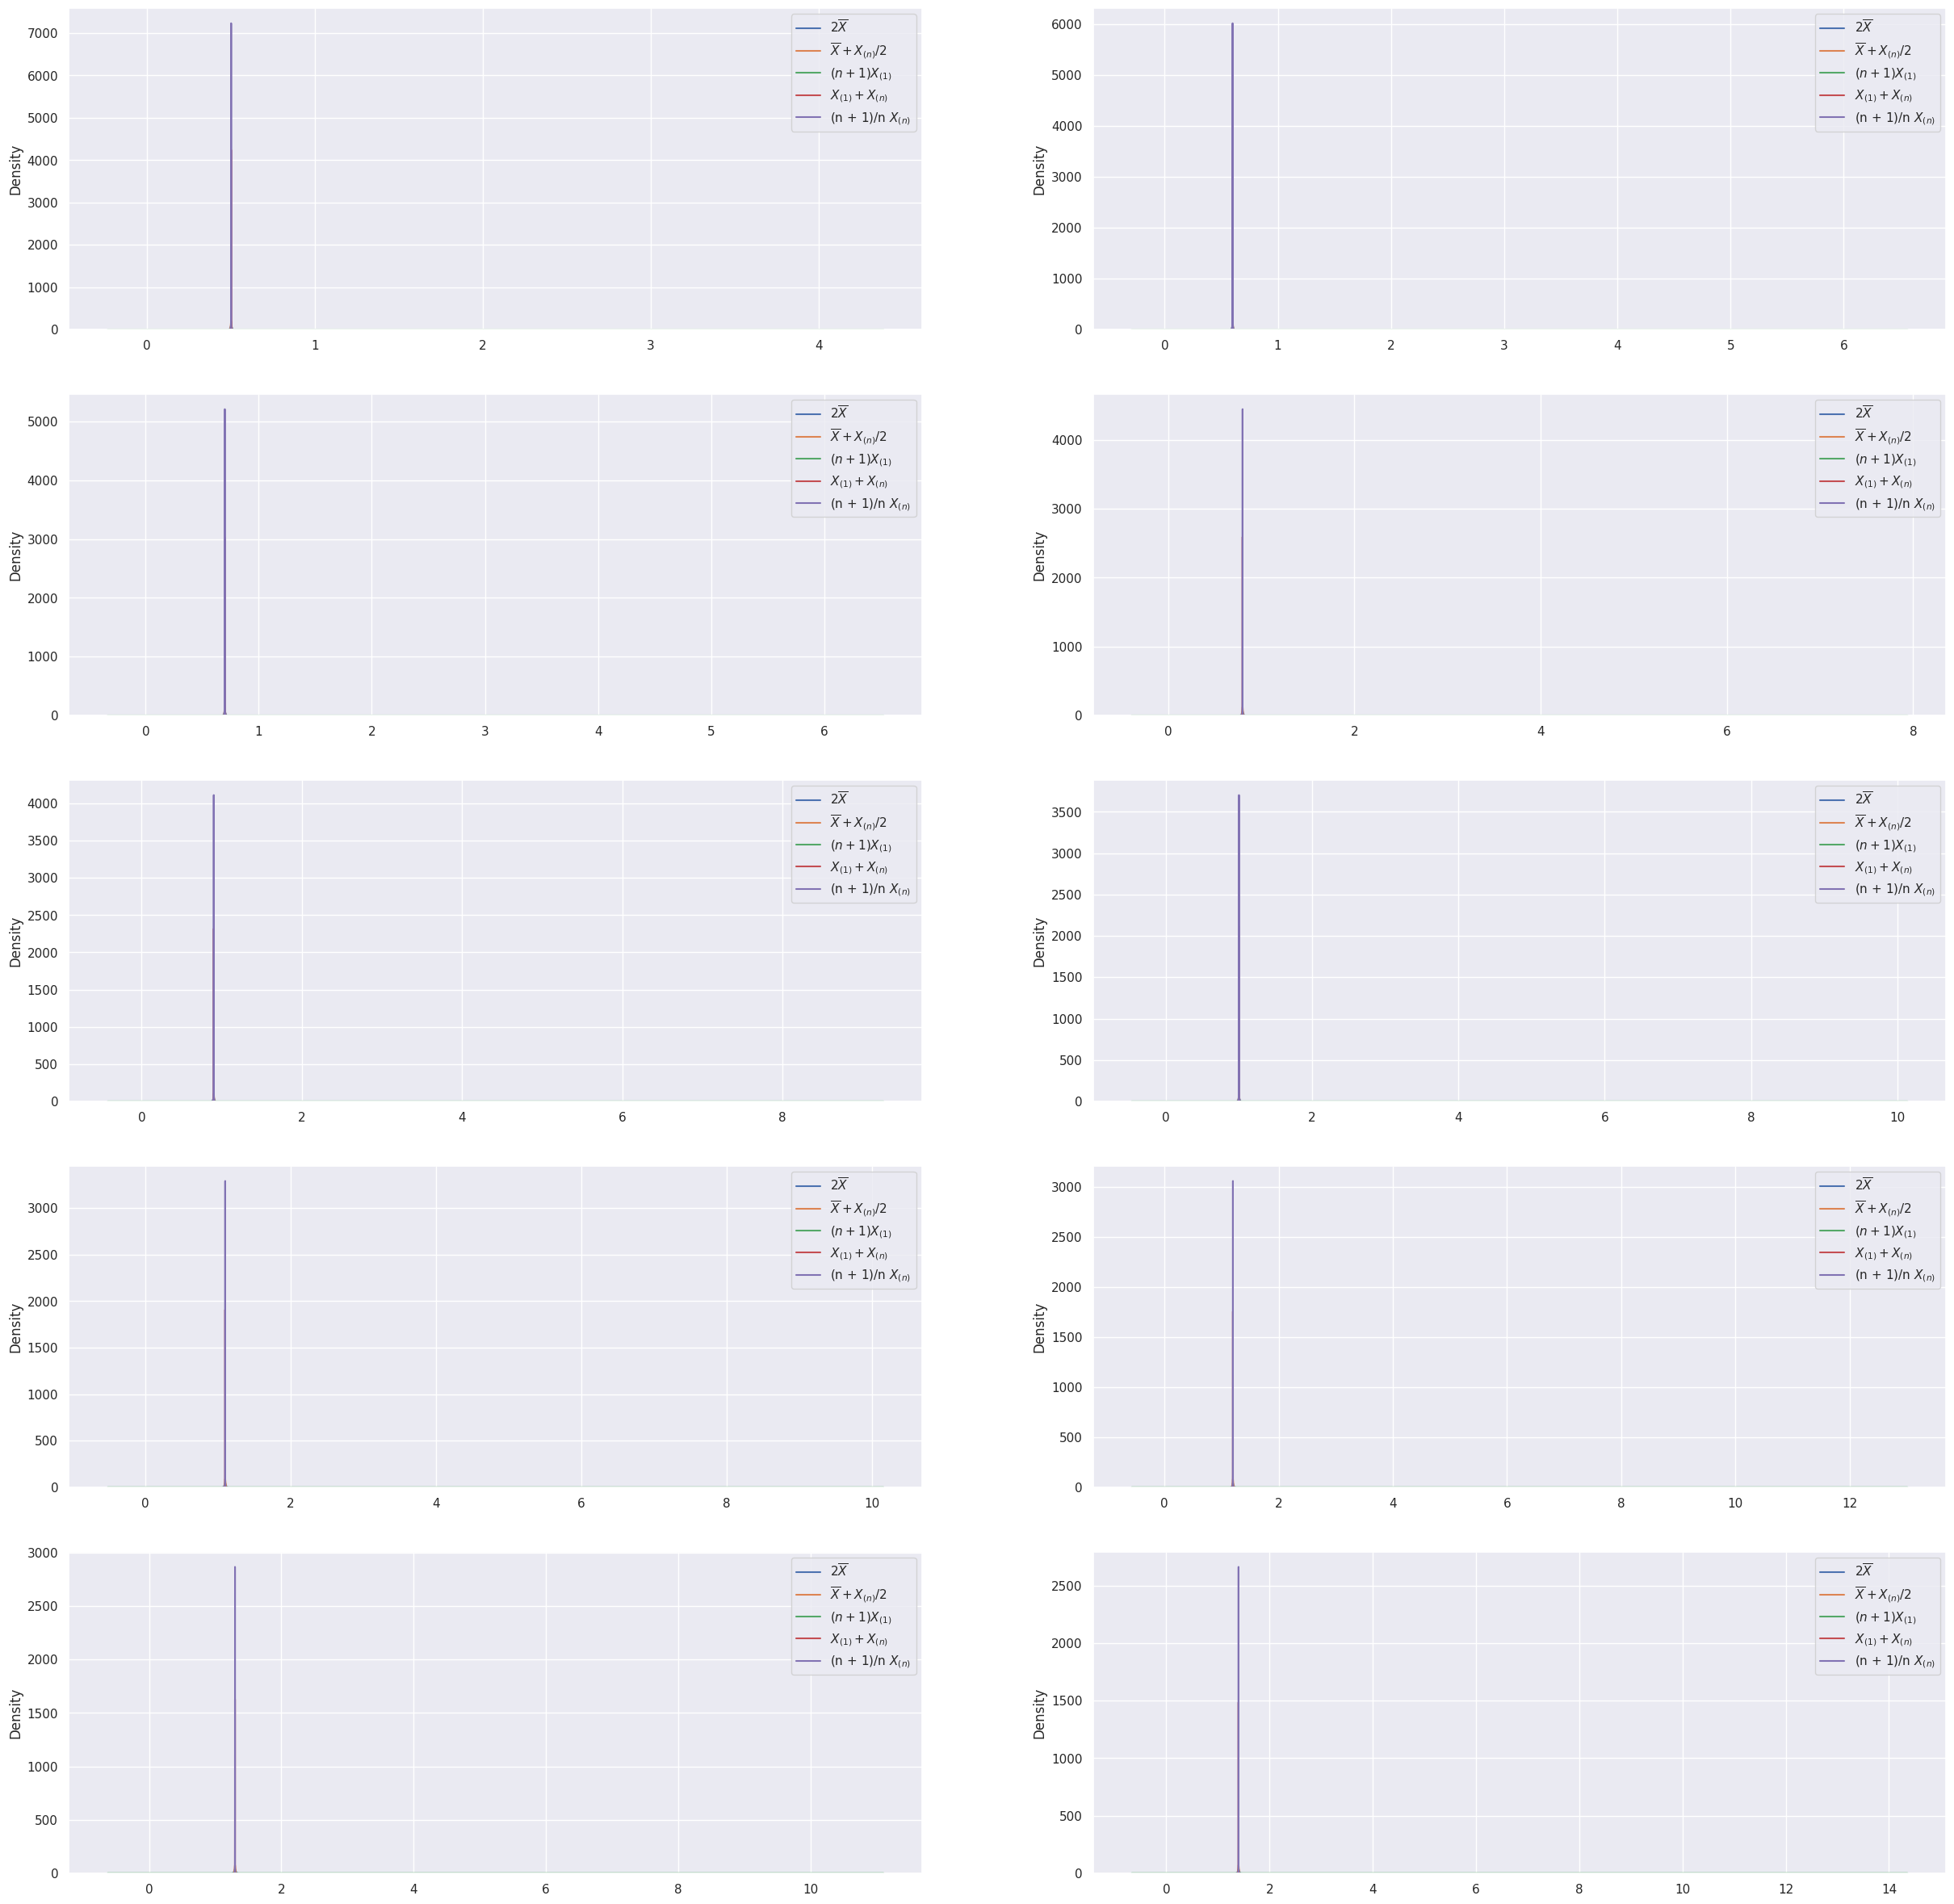

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (30, 30))
M = {1 : '2$\overline{X}$', 2 : '$\overline{X} + X_{(n)} / 2$', 3 : '$(n + 1)X_{(1)}$', 4 : '$X_{(1)} + X_{(n)}$', 5 : '(n + 1)/n $X_{(n)}$'}

for i in range(10):
  for j in ([0, 1, 2, 3, 4]):
    plt.subplot(5, 2, i + 1)
    sns.kdeplot(all_estimations[j][i], label = M[j + 1])
    plt.legend()

Перебрав некоторые комбинации оценок и поняв, что самая худшая из них (что впринципе и показывалось на семинарах) является $(n + 1)X_{(1)}$, попробуем убрать ее из графиков и немного ограничим по y.

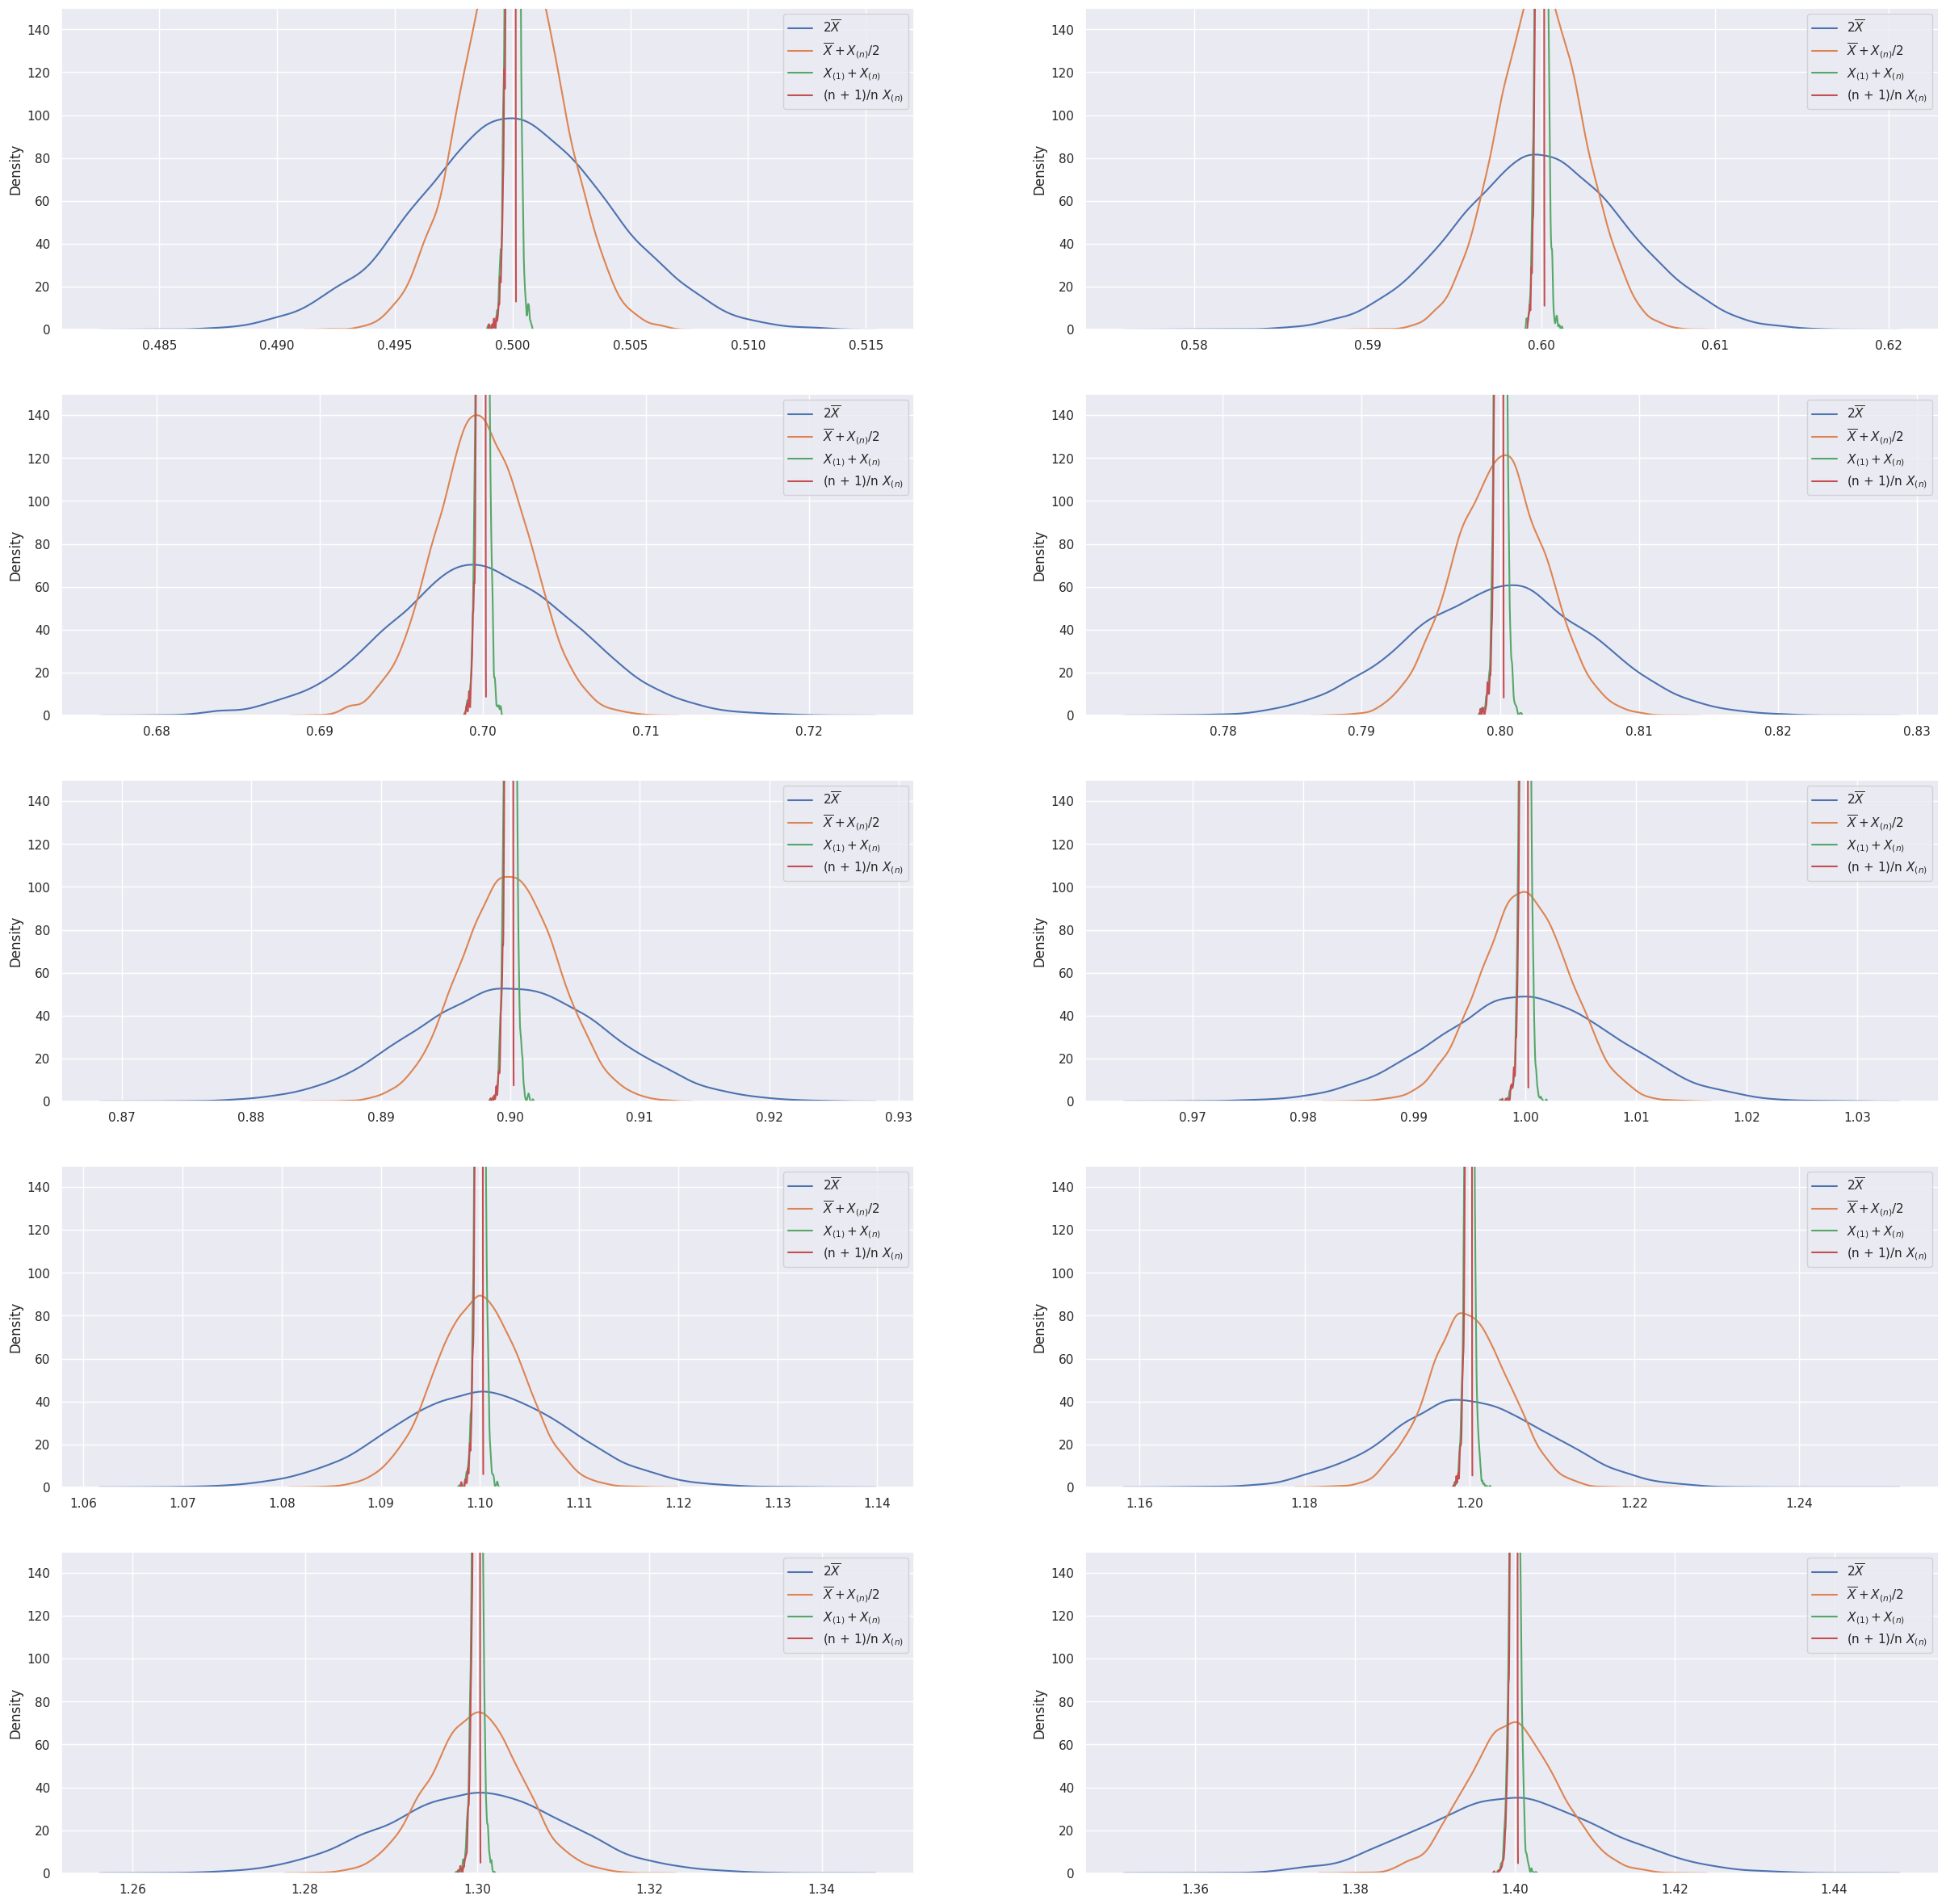

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (30, 30))
M = {1 : '2$\overline{X}$', 2 : '$\overline{X} + X_{(n)} / 2$', 3 : '$(n + 1)X_{(1)}$', 4 : '$X_{(1)} + X_{(n)}$', 5 : '(n + 1)/n $X_{(n)}$'}

for i in range(10):
  for j in ([0, 1, 3, 4]):
    plt.subplot(5, 2, i + 1)
    plt.ylim([0, 150])
    sns.kdeplot(all_estimations[j][i], label = M[j + 1])
    plt.legend()

По этим графикам уже можно увидеть, что лучшей является оценка $\frac{n + 1}{n} X_{(n)}$, т.к. посмотрим на среднеквадратичный подход сравнения оценок. Нам говорится, что оценка $Θ^*_{1}$ лучше, чем $Θ^*_{2}$, если $E(Θ^*_{1} - Θ)^2 \leq E(Θ^*_{2} - Θ)^2$. На графике у нас показана плотность распределения каждой из оценок, а метожидание - интеграл по плотности $E(X) = ∫\limits_{-∞}^{∞}xρ_X(x)dx$, то есть площадь под графиком, а значит графики (зеленый и красный) устраивают нас больше всего (в сравнении красный будет лучше зеленого). А значит эта оценка действительно является лучшей. **Также, есть и другое объяснение этого факта.** Посмотрим на графики и увидим, что у этих двух оценок графики наиболее плотно сосредоточены около настоящего значения θ, а значит они и будут наилучшими.<br><br>
Теперь давайте посчитаем точный и эмперический риски.

In [ ]:
thettas = np.array([i / 10 for i in range(5, 15)])
first_risk = 1 / N * np.sum((first_estimation - thettas[:, np.newaxis]) ** 2, axis=1)
second_risk = 1 / N * np.sum((second_estimation - thettas[:, np.newaxis]) ** 2, axis=1)
third_risk = 1 / N * np.sum((third_estimation - thettas[:, np.newaxis]) ** 2, axis=1)
fourth_risk = 1 / N * np.sum((fourth_estimation - thettas[:, np.newaxis]) ** 2, axis=1)
fifth_risk = 1 / N * np.sum((fifth_estimation - thettas[:, np.newaxis]) ** 2, axis=1)
risk_emperic_all = np.array([first_risk, second_risk, third_risk, fourth_risk, fifth_risk])

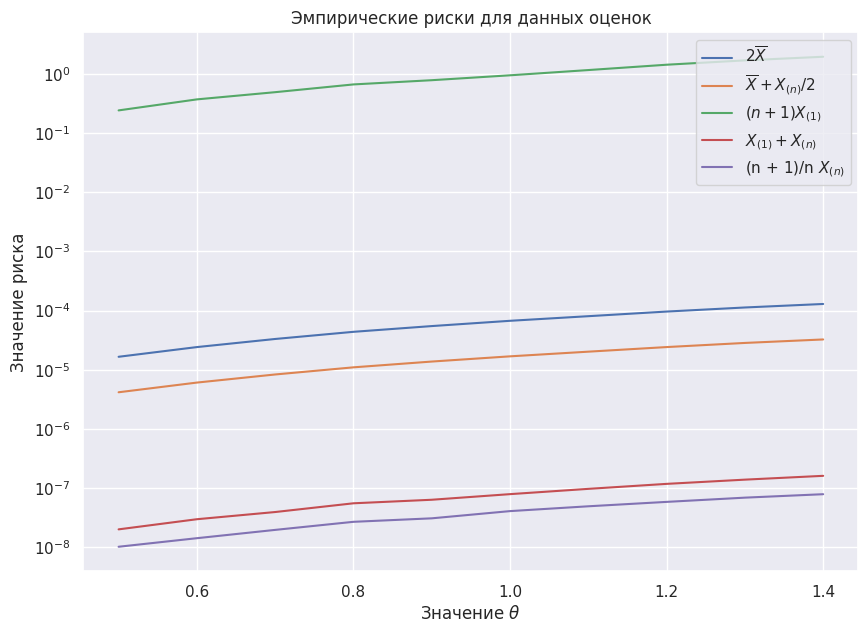

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 7))
plt.plot(thettas, first_risk, label = M[1])
plt.plot(thettas, second_risk, label = M[2])
plt.plot(thettas, third_risk, label = M[3])
plt.plot(thettas, fourth_risk, label = M[4])
plt.plot(thettas, fifth_risk, label = M[5])
plt.yscale('log')
plt.title('Эмпирические риски для данных оценок')
plt.ylabel('Значение риска')
plt.xlabel('Значение ' + r'$\theta$')
plt.legend()

Если эмпирический риск - среднее от функции потерь, то точный риск - матожидание от функции потерь, а значит нам надо посчитать $E(Θ^* - Θ)^2$ для каждой оценки.<br>
Посчитаем функции распределения и плотности для первой и n-ой порядковой статистики (точнее возьмем их как данные, так как их очень просто вывести, а также это не раз проделывалось на семинарах).<br>
$F_{X_{(1)}}(t) = 1 - (1 - F_{X_1}(t))^n$.<br>
$F_{X_{(n)}}(t) = F_{X_1}(t)^n$.<br>
$ρ_{X_{(1)}}(t) = n * \frac{(θ - t) ^ {n - 1}}{θ^n}$.<br>
$ρ_{X_{(n)}}(t) = n * \frac{t ^ {n - 1}}{θ^n}$.<br>
Также знаем, что $E(X_{(k)}) = \frac{k}{n + 1} ⋅ θ$. Еще надо посчитать мат. ожидания произведений среднего и порядковой статистики и двух порядковых статистик для понимания переходов.<br>
$E(X_{(k)}X_{(n)}) = \int\limits_0^θ ydy \int\limits_0^y xρ_{k, n}(x, y)dx = \frac{k}{n + 2} \cdot θ^2$<br>
$E(\overline{X}X_{(n)}) = \frac{1}{n}\sum\limits_{k = 1}^n E(X_kX_{(n)}) = \frac{1}{n} \sum\limits_{k = 1}^n E(X_{(k)}X_{(n)}) = \frac{n + 1}{2(n + 2)}$<br>
Теперь переходим к подсчету искомых мат. ожиданий<br>
1) $E(2\overline{X} - θ)^2 = E(4\overline{X}^2 - 4\overline{X}θ + θ^2)$.<br>
$E(\overline{X}^2) = \frac{1}{n^2} * (\sum \limits_{i=1}^n x_i)^2 = \frac{1}{n^2} * [\sum \limits_{i=1}^n |Ex^2| + \sum \limits_{i \neq j} (Ex_i)(Ex_j)] = \frac{1}{n^2}(\frac{nθ^2}{3} + 2 * \frac{n(n - 1)}{2} * \frac{θ^2}{4})$<br>
$E\overline{X} = \frac{1}{n} * n * EX_1 = \frac{θ}{2}$.<br>
Тогда $E(2\overline{X} - θ)^2 = \frac{θ^2}{3n}$<br>
Остальные матожидания считаются примерно аналогично (пользуемся свойствами дисперсии, мат. ожидания и т.д.), поэтому сразу напишем формулы.<br>
2) $E(\overline{X} + \frac{X_{(n)}}{2} - θ) ^ 2 = \frac{n^2 + 15n + 2}{12n(n + 1)(n + 2)} \cdot θ^2$<br>
3) $E((n + 1)X_{1} - θ) ^ 2 = \frac{n}{n + 2} \cdot θ^2$<br>
4) $E(X_{(1)} + X_{(n)} - θ) ^ 2 = \frac{2}{(n + 1)(n + 2)} ⋅ θ^2$<br>
5) $E(\frac{n + 1}{n}X_{(n)} - θ) ^ 2 = \frac{1}{n(n + 2)} \cdot θ^2$<br>

Теперь нарисуем теоретические риски и эмпирические на одном рисунке для каждой оценки.

In [ ]:
risk_theory_1 = thettas ** 2 / (3 * n)
risk_theory_2 = thettas ** 2 * ((n ** 2 + 15 * n + 2) / (12 * (n + 1) * (n + 2)))
risk_theory_3 = thettas ** 2 * (n / (n + 2))
risk_theory_4 = thettas ** 2 * (2 / ((n + 1) * (n + 2)))
risk_theory_5 = thettas ** 2 * (1 / (n * (n + 2)))
risk_theory_all = np.array([risk_theory_1, risk_theory_2, risk_theory_3, risk_theory_4, risk_theory_5])

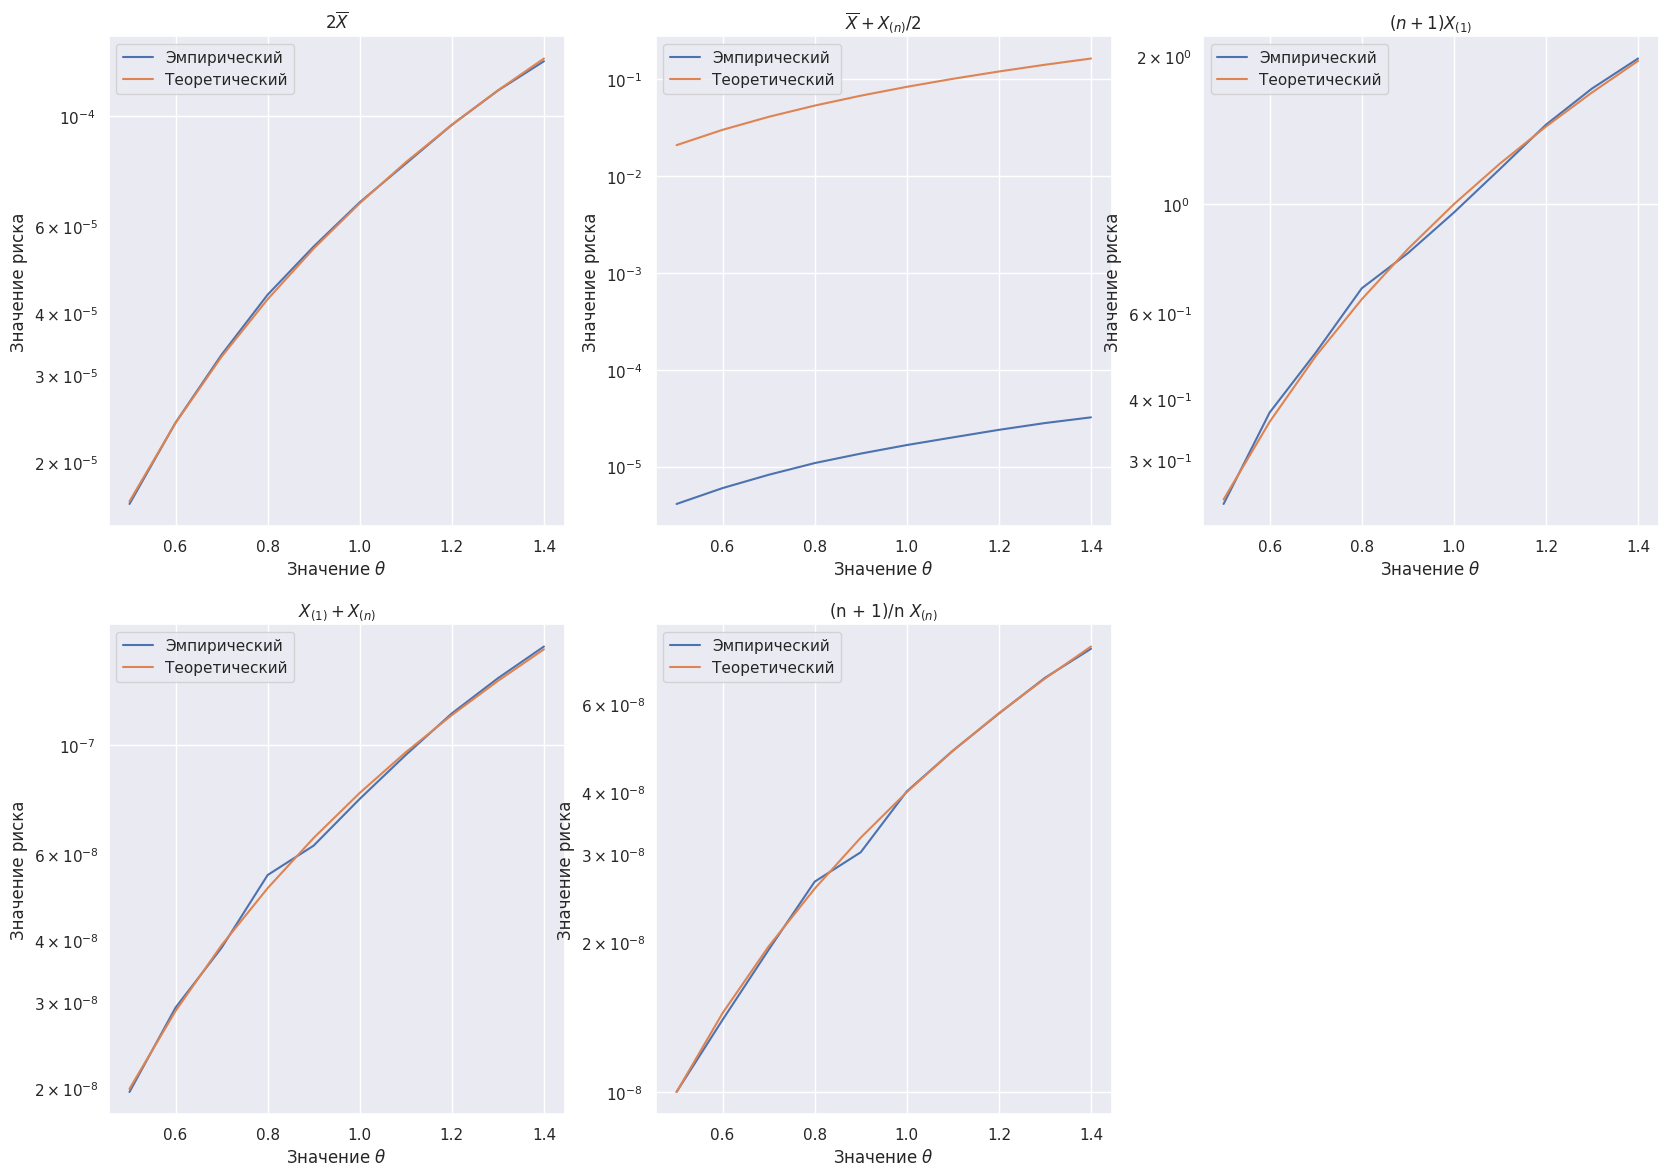

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (20, 14))
for graph in range(5):
  plt.subplot(2, 3, graph + 1)
  plt.plot(thettas, risk_emperic_all[graph], label = 'Эмпирический')
  plt.plot(thettas, risk_theory_all[graph], label = 'Теоретический')
  plt.yscale('log')
  plt.title(M[graph + 1])
  plt.ylabel('Значение риска')
  plt.xlabel('Значение ' + r'$\theta$')
  plt.legend()

Видим, что теоретический и эмпирический риски практически совпадают для всех оценок, кроме второй. Также сразу можно сказать, что теорема Рао-Крамера выполняться не будет, так как не будет выполняться даже условие регулярности. Это происходит, так как у нас носитель зависит от θ (в нашем случае отрезок от 0 до θ). Эффективная оценка - та, для которой в неравенстве Рао-Крамера будет стоять равенство, но у нас не выполняются даже условия этой теоремы, а значит такой оценки не существует. Также по графику можно увидеть, что теоретический и эмпирический риски имееют одинаковый характер возрастания, что вполне логично, так как эмпирический риск может использоваться для оценки теоретического.

Пусть теперь $\theta$ само приходит из равномерного распределения $U[0, 1]$. При помощи моделирования посчитайте эмпирический риск в байесовском подходе к сравнению оценок и сравните оценки. Сохранится ли порядок оценок по качеству? Почему?

Постройте на одном графике разными цветами для всех оценок эмпирическую функцию распределения или гистограмму (аналог эмпирической плотности). Если некоторые оценки сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (или бинами гистограммы). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

Какая оценка получилась лучше? Как Вы это поняли?

__Ответ:__


Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

Сделайте вывод.


__Вывод:__

### Задача 2

Конрийские провинции известны своими пастбищами и скотоводами. Принц Нерсей Пройас замерил, что количество скота подчиняется экспоненциальному распределению с параметром $\lambda = 1$ (в тысячах голов). Для подсчёта оценки параметра есть семейство оценок $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$, каждая следующая из которых требует большего числа операций на вычисление. Стоит ли оно того? Это и нужно выяснить.

Сгенерируйте $N$ выборок $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$.

In [ ]:
np.random.seed(42)

Для данного задания было принято решение уменьшить N и увеличить размер выборки. Сделано это не просто так, большой размер выборки поможет отчетливее понять, что при всех k эта оценка является асимптотически нормальной, в то время как при маленьком размере выборки и больших k, такого по графику сказать было нельзя, что означает лишь одно - эксперимент некорректен (так как теория показывает, что эта оценка является асимптотически нормальной при всех k). Почему нельзя увеличить размер выборки и оставить N = 1e4? Потому что на ноутбуке не хватает ОЗУ, а бесплатная версия гугл коллаба не позволяет использовать больше 12Гб.

In [ ]:
N = 5e2
N = int(N)
n = int(1e6)
sp = sps.expon(scale=1).rvs(size=(N, n))
sp = np.array(sp)
sp.shape

(500, 1000000)

In [ ]:
all_estimations = []
for k in range(1, 11):
  all_estimations.append([])
  for i in range(N):
    all_estimations[-1].append((np.math.factorial(k) / np.mean(sp[i] ** k)) ** (1/k))
  all_estimations[-1] = np.array(all_estimations[-1])
all_estimations = np.array(all_estimations)
all_estimations.shape

<ipython-input-15-fba54580bb91>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  all_estimations[-1].append((np.math.factorial(k) / np.mean(sp[i] ** k)) ** (1/k))


(10, 500)

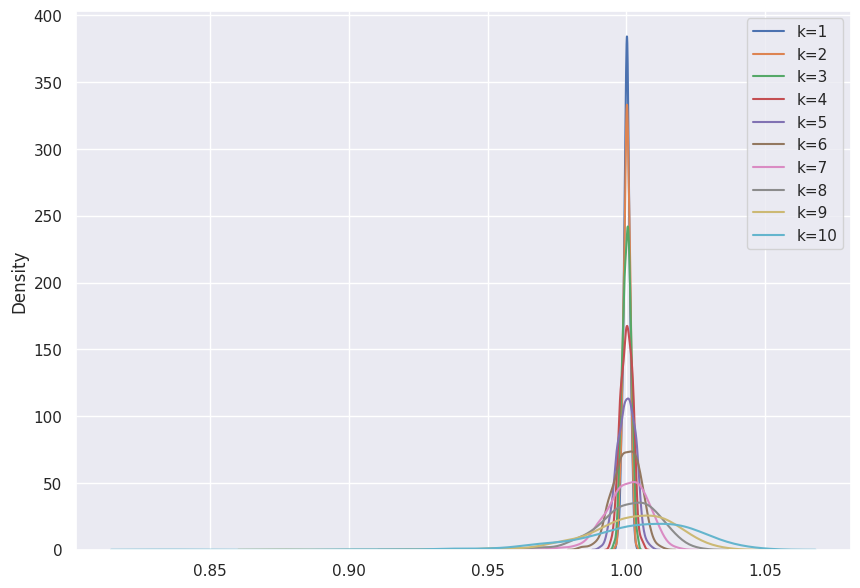

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 7))

for i in range(10):
  sns.kdeplot(all_estimations[i], label = 'k=' + str(i + 1))
  plt.legend()

По графикам несложно увидеть, что при малых k оценка ведет себя намного лучше, потому что плотность сильнее сконцентрирована около истинного значения θ, а также больше похожа на график нормального распределения с параметром 0. Поэтому вполне логично, что не стоит увеличивать k, а можно использовать эту оценку с маленькими k, тогда и вычисления будут проще и оценка будет точнее.

Теперь покажем асиптотическую нормальность практически (построим плотность распределения статистики $\sqrt{n}(\theta^* - \theta)$, она должна (так как в асимптотической нормальности у нас стремление по распределению) стремиться к нормальному распределению.

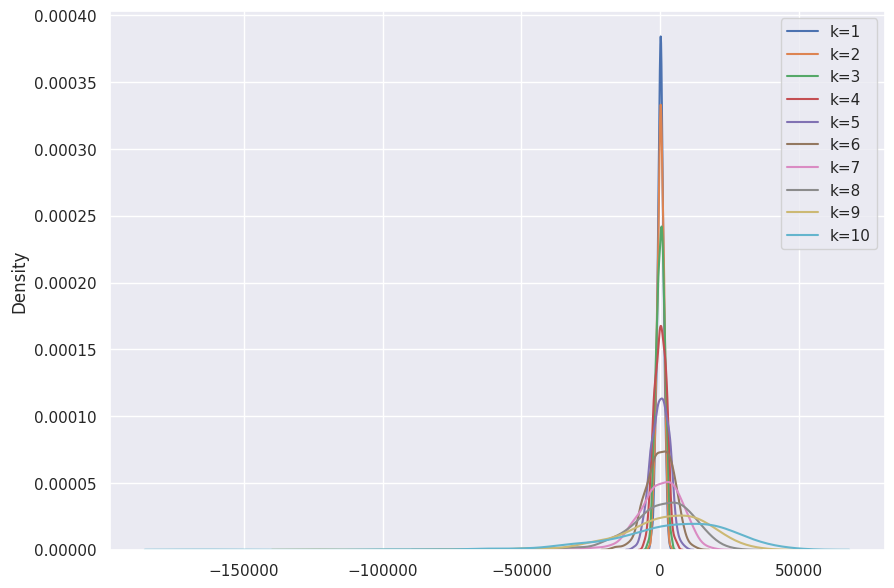

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 7))

for i in range(10):
  sns.kdeplot(((int(1e12)) ** (1/2)) * (all_estimations[i] - 1), label = 'k=' + str(i + 1))
  plt.legend()

Теперь докажем это теоретически.<br>
$X_{1}, ..., X_{N}$ ~ $Exp(1)$.<br>
Надо проверить, что $\sqrt{n}((\frac{k!}{\overline{X}_{k}})^\frac{1}{k} - θ) -> N(0, σ^2(θ))$.<br>
$EX^k = \frac{k!}{θ^k}$ - выводилось на семинарах по теореии вероятности и мат статистике.<br>
Введем $η_i = X_i^k => \overline{X^k} = \overline{η}, Eη_i = \frac{k!}{θ^k}$.<br>
По ЦПТ получаем, что $\sqrt{n}(\overline{η} - Eη_i) -> N(0, σ_η^2)$ => $\sqrt{n}(\overline{η} - \frac{k!}{θ^k}) -> N(0, σ_η^2)$.<br>
Теперь воспоьзуемся дельта методом:<br>
$b_n = \frac{1}{\sqrt{n}}, h(x) = (\frac{k!}{x})^\frac{1}{k}, \xi_n = \sqrt{n}(\overline{η} - \frac{k!}{θ^k}), a = Eη_i = \frac{k!}{θ^k}$<br>
$\frac{h(a + ξ_nb_n) - h(a)}{b_n} -> h^{'}(a)ξ_n$ (\*)<br>
$h(a) = θ, h(a + ξ_nb_n) = (\frac{k!}{\overline{η}})^\frac{1}{k}$<br>
Из (\*) и того, что $ξ_n$ ~ $N(0, σ_η^2)$ с подставлением значений функции получаем требуемое.<br>
Теперь объединяем все и получаем следующее: Плотность оценки сходится к плотности нормального, значит плотность распределения данной статистики сходится по распределению к нормальному, а это уже значит, что оценка является асимптотически нормальной.<br>
Значит доказали и практически и теоретически!

Теперь продолжим вычисления, которые представлены выше, чтобы найти асимптотическую дисперсию.
$h^{'}(a) = -(\frac{(k!)^\frac{1}{k}}{k \cdot a^\frac{1+k}{k}}) = -(\frac{θ^{1+k}}{k \cdot (k!)})$<br>
Тогда дисперсия будет равна: $Dη_i \cdot h^{'}(a) = (\frac{(2k)! - (k!)^2}{k^2 \cdot (k!)^2}) \cdot θ^2$<br>
Ее мы и будем использовать, как теоретическую в последнем вопросе. Как практическую мы будем использовать np.std ** 2 (стандартное отклонение).

Для всех выборок посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$). Являются ли данные оценки асимптотически нормальными? Проверьте это теоретически и моделированием (постройте эмпирическую функцию/плотность распределения статистики $\sqrt{n}(\theta^* - \theta)$). Посчитайте дисперсию оценок для разных $k$ и разных размеров выборки. Сходится ли она к теоретической? Что Вы можете сказать о скорости сходимости?

In [ ]:
#Сгенерируем новую выборку нормального размера
N = 10000
N = int(N)
sp = []
for i in range(N):
  sp.append(sps.expon(scale=1).rvs(size=N))
sp = np.array(sp)
sp.shape

(10000, 10000)

In [ ]:
def cum_sum(X):
  return X.cumsum(axis = 1) / (np.arange(len(X[0])) + 1)

def cum_estimation(X, k):
  return (np.math.factorial(k) / cum_sum(X ** k)) ** (1 / k)

<ipython-input-20-ea7d5a473231>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  disp_theor = [(np.math.factorial(2 * k) - np.math.factorial(k) ** 2) / (k ** 2) / (np.math.factorial(k) ** 2)] * len(iters)


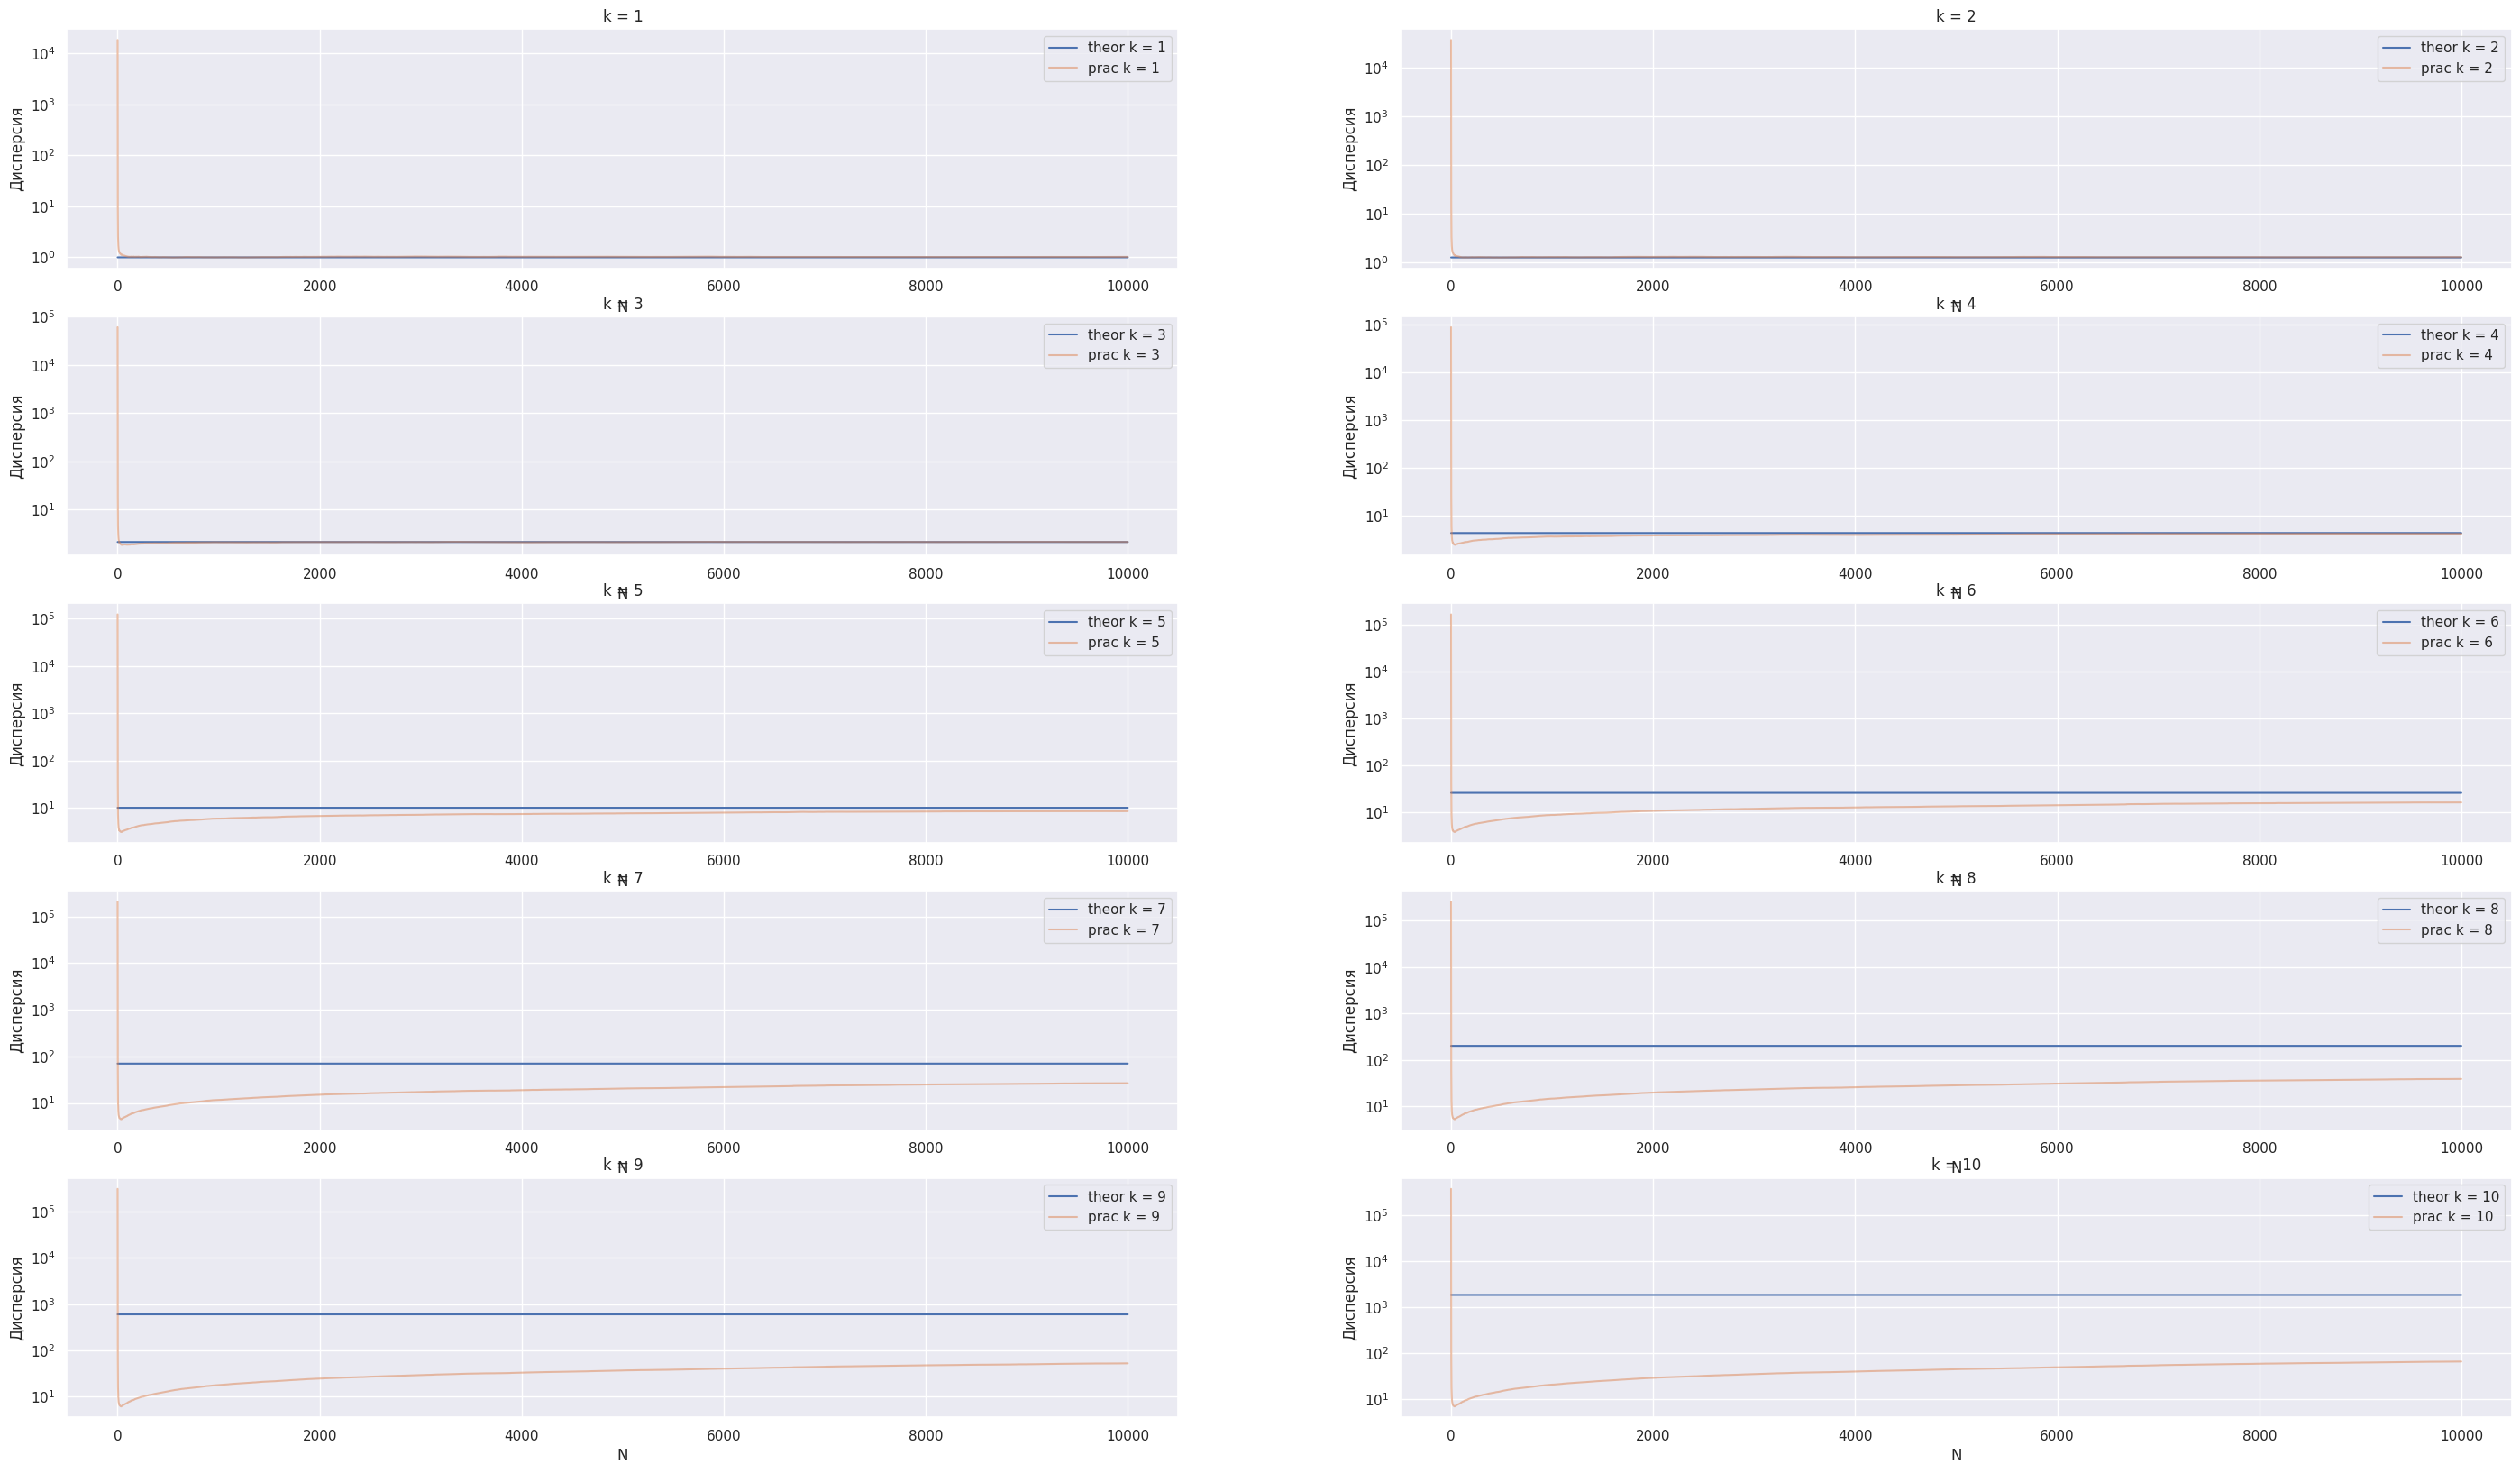

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (35, 20))
iters = [i for i in range(len(sp[0]))]
for k in range(1, 11):
  disp_theor = [(np.math.factorial(2 * k) - np.math.factorial(k) ** 2) / (k ** 2) / (np.math.factorial(k) ** 2)] * len(iters)
  disp_prac = np.std(((np.arange(len(sp[0])) + 1) ** 0.5) * (cum_estimation(sp, k) - 1), axis=0) ** 2
  plt.subplot(5, 2, k)
  plt.title(f'k = {k}')
  plt.plot(iters, disp_theor, label = "theor k = " + str(k))
  plt.plot(iters, disp_prac, label = "prac k = " + str(k), alpha=0.5)
  plt.yscale('log')
  plt.xlabel("N")
  plt.ylabel("Дисперсия")
  plt.legend()


Сделайте вывод.


Ответ на вопрос: `Посчитайте дисперсию оценок для разных  k  и разных размеров выборки. Сходится ли она к теоретической? Что Вы можете сказать о скорости сходимости?`<br>
Да, как мы видим на графиках, она сходится к теоретической, причем с ростом k все хуже и хуже. Также можно увидеть, что сходимость имеет логарифмический характер.

__Вывод:__ Проведя множество экспериментов над оценкой, данной нам в этом задании мы поняли, что оптимальнее всего эта оценка ведет себя при маленьких k, а с ростом k становится все хуже и хуже. Также мы доказали, что эта оценка при всех k является асимптотически нормальной, а также нашли ее асимптотическую дисперсию. Начертив графики теоретической и истинной дисперсии, мы поняли, что второй из них стремится к теоретической с логарифмическим характером, что еще раз доказывает асимптотическую нормальность данной нам оценки при разных k.

### Задача 3

Кианские провинции до сих пор надеются отделиться от Новой Империи, и поэтому планируют саботировать Ордалию. К их счастью, число урожая в пустынных землях на юге подчиняется распределению Коши, которое отличается существенно от двух распределений из задач 1 и 2. Чем отличается? Как это повлияет на оценивание его параметра сдвига?

Мы знаем, что распределение Коши не имеет математического ожидания и дисперсии, также не всегда имеет конечные моменты (а значит мы не сможем пользоваться ЦПТ), а значит мы не сможем воспользоваться оценками, которыми пользовались в предыдущих заданиях, или например принципом среднеквадратичного подхода к сравнению оценок. Точнее говоря, мы сможем найти все эти оценки, но сравнить их так просто, как раньше мы не сможем (по крайней мере известными нам способами, такими как принцип среднеквадратичного подхода к сравнению оценок или сравнение эмпирического и точного рисков).

Для распределения Коши моделированием изучите поведение оценки параметра сдвига при помощи среднего и медианы. У какой из этих оценок лучше асимптотические свойства? Как это обосновывается теоретическими свойствами оценок? Моделированием проверьте, какие оценки состоятельны и асимптотически нормальны. Сравните результат с теоретическим.

In [ ]:
N = int(1e3)
sp = sps.cauchy(loc=0).rvs(size=(N, N * 10))
sp = np.array(sp)

In [ ]:
#Считаем оценку при помощи медианы
median_estimations = []
for i in range(1, N + 1):
  median_estimations.append(np.median(sp[:, :i], axis=1))
median_estimations = np.array(median_estimations)

In [ ]:
#Считаем оценку при помощи среднего
mean_estimations = []
for i in range(1, N + 1):
  mean_estimations.append(np.mean(sp[:, :i], axis=1))
mean_estimations = np.array(mean_estimations)

Text(0.5, 1.0, 'Оценка выборочной медианы распределния Коши')

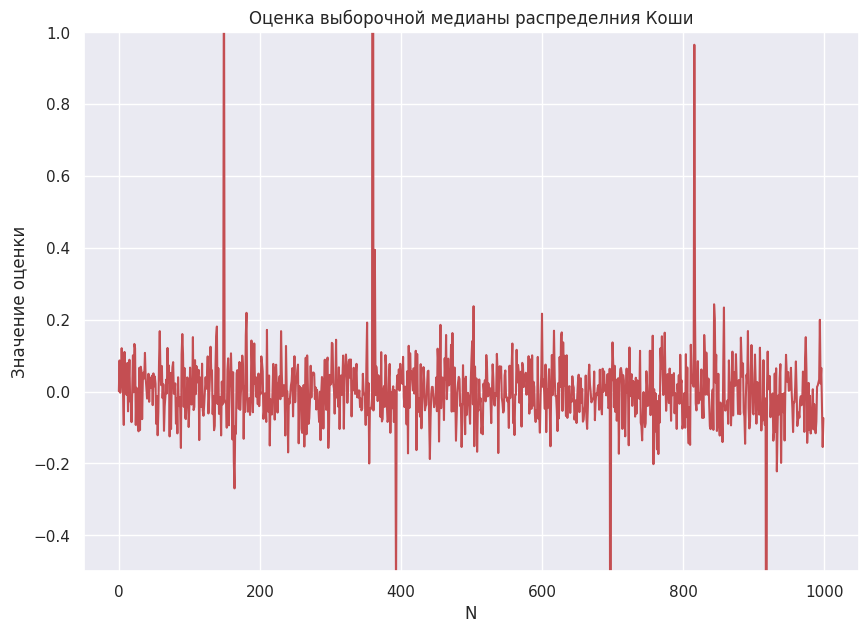

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 7))
plt.plot(np.mean(median_estimations, axis = 0), color='r')
plt.ylim([-0.5, 1])
plt.xlabel("N")
plt.ylabel("Значение оценки")
plt.title('Оценка выборочной медианы распределния Коши')

Text(0.5, 1.0, 'Оценка выборочного среднего распределния Коши')

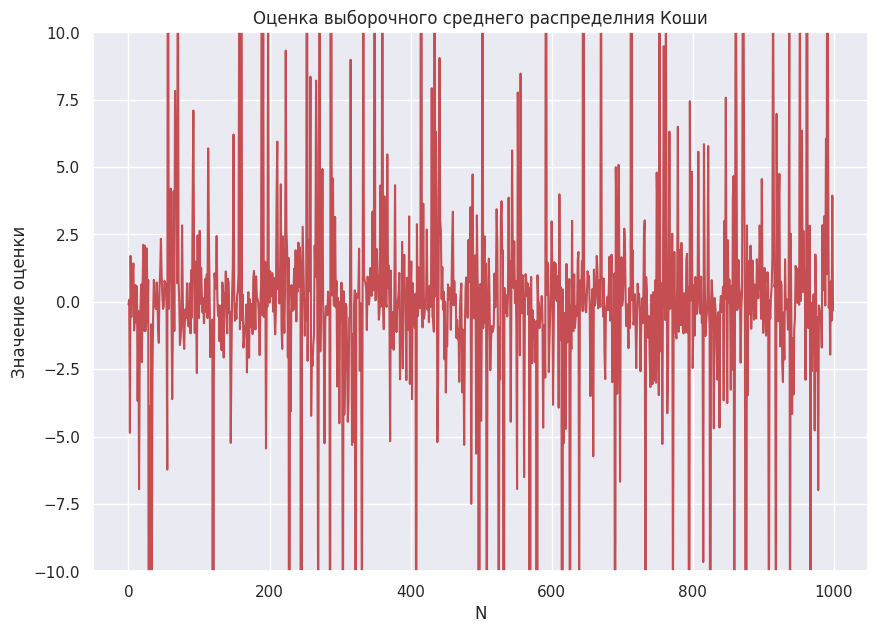

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 7))
plt.plot(np.mean(mean_estimations, axis = 0), color='r')
plt.ylim([-10, 10])
plt.xlabel("N")
plt.ylabel("Значение оценки")
plt.title('Оценка выборочного среднего распределния Коши')

По этим графикам видно, что из этих двух оценок только медиана является состоятельной, а выборочное среднее явно таковым не является. Это также можно объяснить и теоретически, заметим, что медиана (не выборочная, а обычная) делит распределение на две части (в середине), то есть она является оценкой сдвига (параметра положения) распределения Коши, так как его медиана в точности и равна loc. Для среднего же мы не сможем посчитать мат. ожидание, чтобы доказать, что она несмещенная, значит, исходя из противного, можно сказать, что она таковой не является.

Теперь рассмотрим **асимптотическую нормальность**. Для чего изобразим оценки $\sqrt{n}(\hatθ - θ)$ для медианы и среднего и сравним их с нормальным распределением.

In [ ]:
mean_estimation = np.sqrt(N * 10) * (np.mean(sp, axis = 1) - 0)
median_estimation = np.sqrt(N * 10) * (np.median(sp, axis = 1) - 0)

Text(0.5, 1.0, 'Распределение оценки $\\sqrt{n}(\\hatθ - θ)$ медианы')

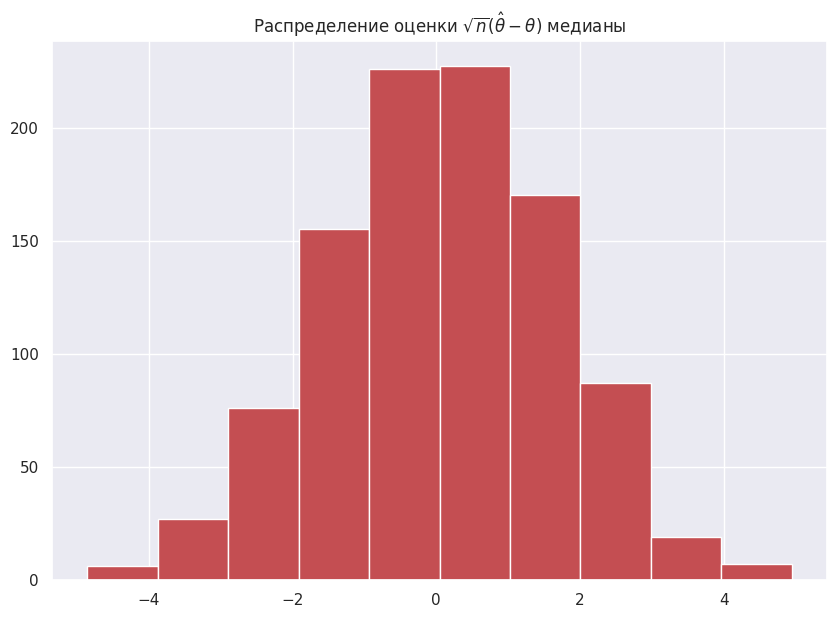

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 7))
plt.hist(median_estimation, color='r')
plt.title('Распределение оценки ' + r'$\sqrt{n}(\hatθ - θ)$' + ' медианы')

Text(0.5, 1.0, 'Распределение оценки $\\sqrt{n}(\\hatθ - θ)$ среднего')

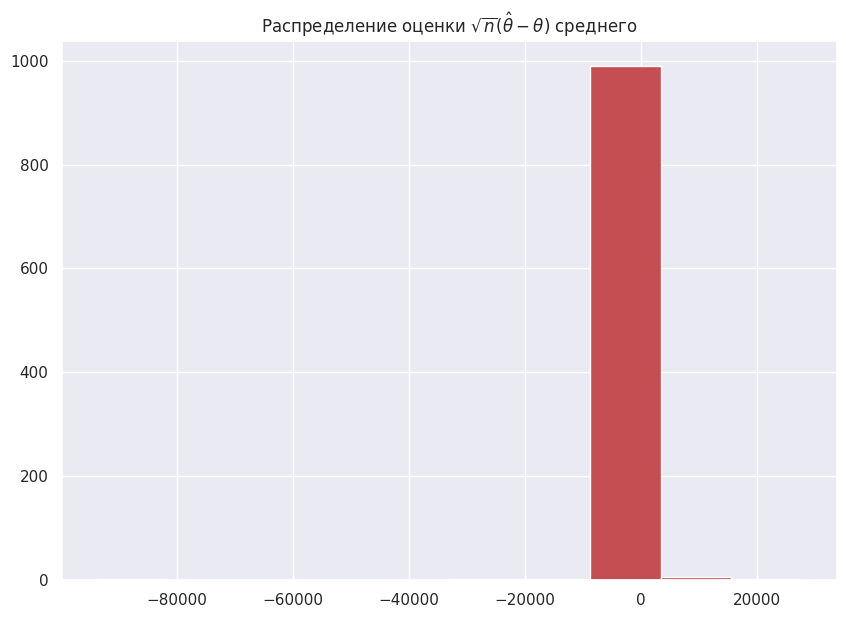

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 7))
plt.hist(mean_estimation, color='r')
plt.title('Распределение оценки ' + r'$\sqrt{n}(\hatθ - θ)$' + ' среднего')

Как и предполагалось, оценка медианой будет асимптотически нормально (по гистограмме видно, что оно имеет вид плотности нормального распрпеделения). Зато такого нельзя сказать про оценку средним, она асимптотически нормальной не будет.

Изучите эмпирическое распределение выборочной дисперсии для распределения Коши и проверьте состоятельность оценки.

In [ ]:
def first_term(sp, flag = 0):
  if flag:
    return np.cumsum(np.power(sp, 2), axis = 1) / np.arange(1, len(sp[0]) + 1)
  else:
    return np.sum(np.power(sp, 2), axis = 1) / len(sp[0])
def second_term(sp, flag = 0):
  if flag:
    return np.power(np.cumsum(sp, axis = 1) / np.arange(1, len(sp[0]) + 1), 2)
  else:
    return np.power(np.sum(sp, axis = 1) / len(sp[0]), 2)

In [ ]:
sample_disps = first_term(sp, 1) - second_term(sp, 1)

Text(0.5, 1.0, 'Оценка выборочной дисперсии распределния Коши')

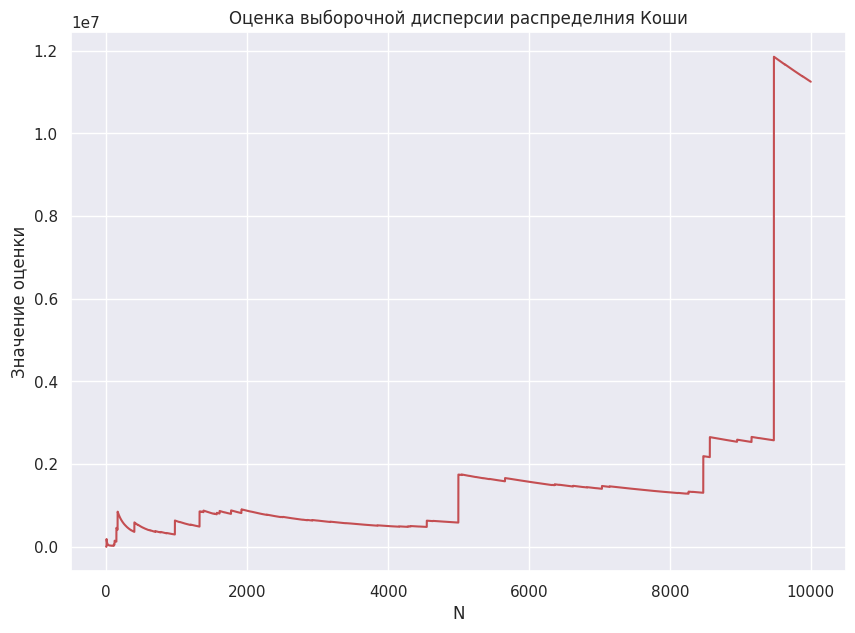

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 7))
plt.plot(np.mean(sample_disps, axis = 0), color='r')
plt.xlabel("N")
plt.ylabel("Значение оценки")
plt.title('Оценка выборочной дисперсии распределния Коши')

Видим по графику, что несмещенной оценка выборочной дисперсией распределния Коши точно не является.

In [ ]:
sample_disp = np.sqrt(N * 10) * (first_term(sp) - second_term(sp))

Text(0.5, 1.0, 'Распределение оценки $\\sqrt{n}(\\hatθ - θ)$ выборочной дисперсии')

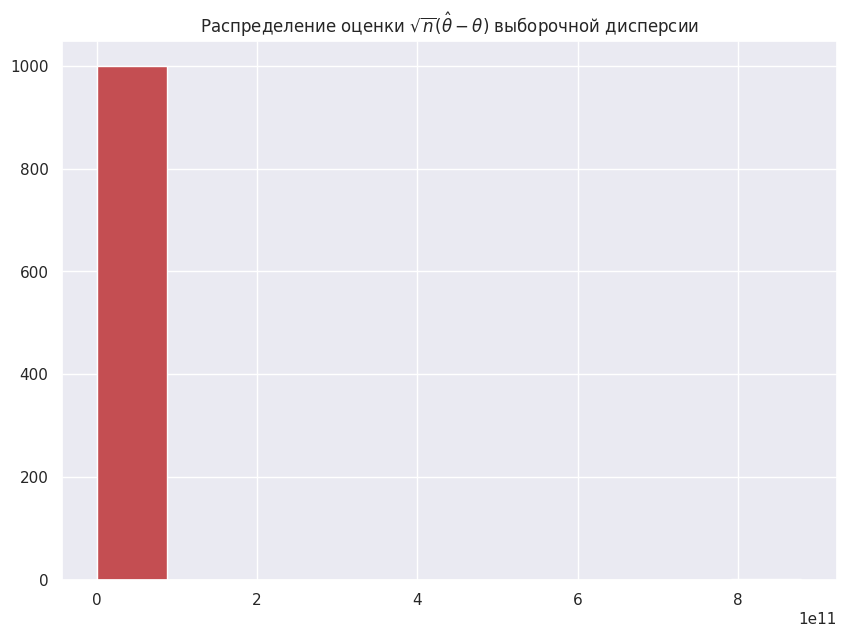

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 7))
plt.hist(sample_disp, color='r')
plt.title('Распределение оценки ' + r'$\sqrt{n}(\hatθ - θ)$' + ' выборочной дисперсии')

Видим картинку, похожую на оценку среднимм. Понятно, что оценка распределения Коши выборочной дисперсией не будет асимптотически нормальной, исходя из гистограммы.

**Вывод:** В этом задании, проанализировав разные оценки для распределения Коши, получили, что оценка медианой является состоятельной и асимптотически нормальной При этом оценки средним и выборочной дисперсий не будут обладать такими свойствами.

### Задача 4

Древние свитки из Сареотской библиотеки хранят знания двух древних волшебников севера --- Гливенко и Кантелли. Два мага-гностика придумали ультимативный способ оценивания распределений количества чего угодно. Их способом пользовались короли севера ещё две тысячи лет назад, во времена Первой Ордалии. Аспект-Император отдал приказ проверить, верны ли их выкладки до сих пор.

Сгенерируйте $N$ выборок $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [ ]:
np.random.seed(42)
N = int(1e4)

sample = sps.norm(loc=0, scale=1).rvs(size=N)

Для всех $n \leqslant N$ первой выборки посчитайте эмпирическую функцию распределения.


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

#ecdfs: typing.List[ECDF] = [ECDF(X.sample[:i]) for i in range(1, len(X) + 1)]

ecdfs = np.array([])
for i in range(N):
  ecdfs = np.append(ecdfs, ECDF(sample[:i + 1]))
ecdfs.shape

(10000,)

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

Проверьте выполнение теоремы Гливенко-Кантелли.

In [ ]:
n_array = [10, 25, 50, 100, 1000, N]
t = np.arange(-5, 5, 0.001)

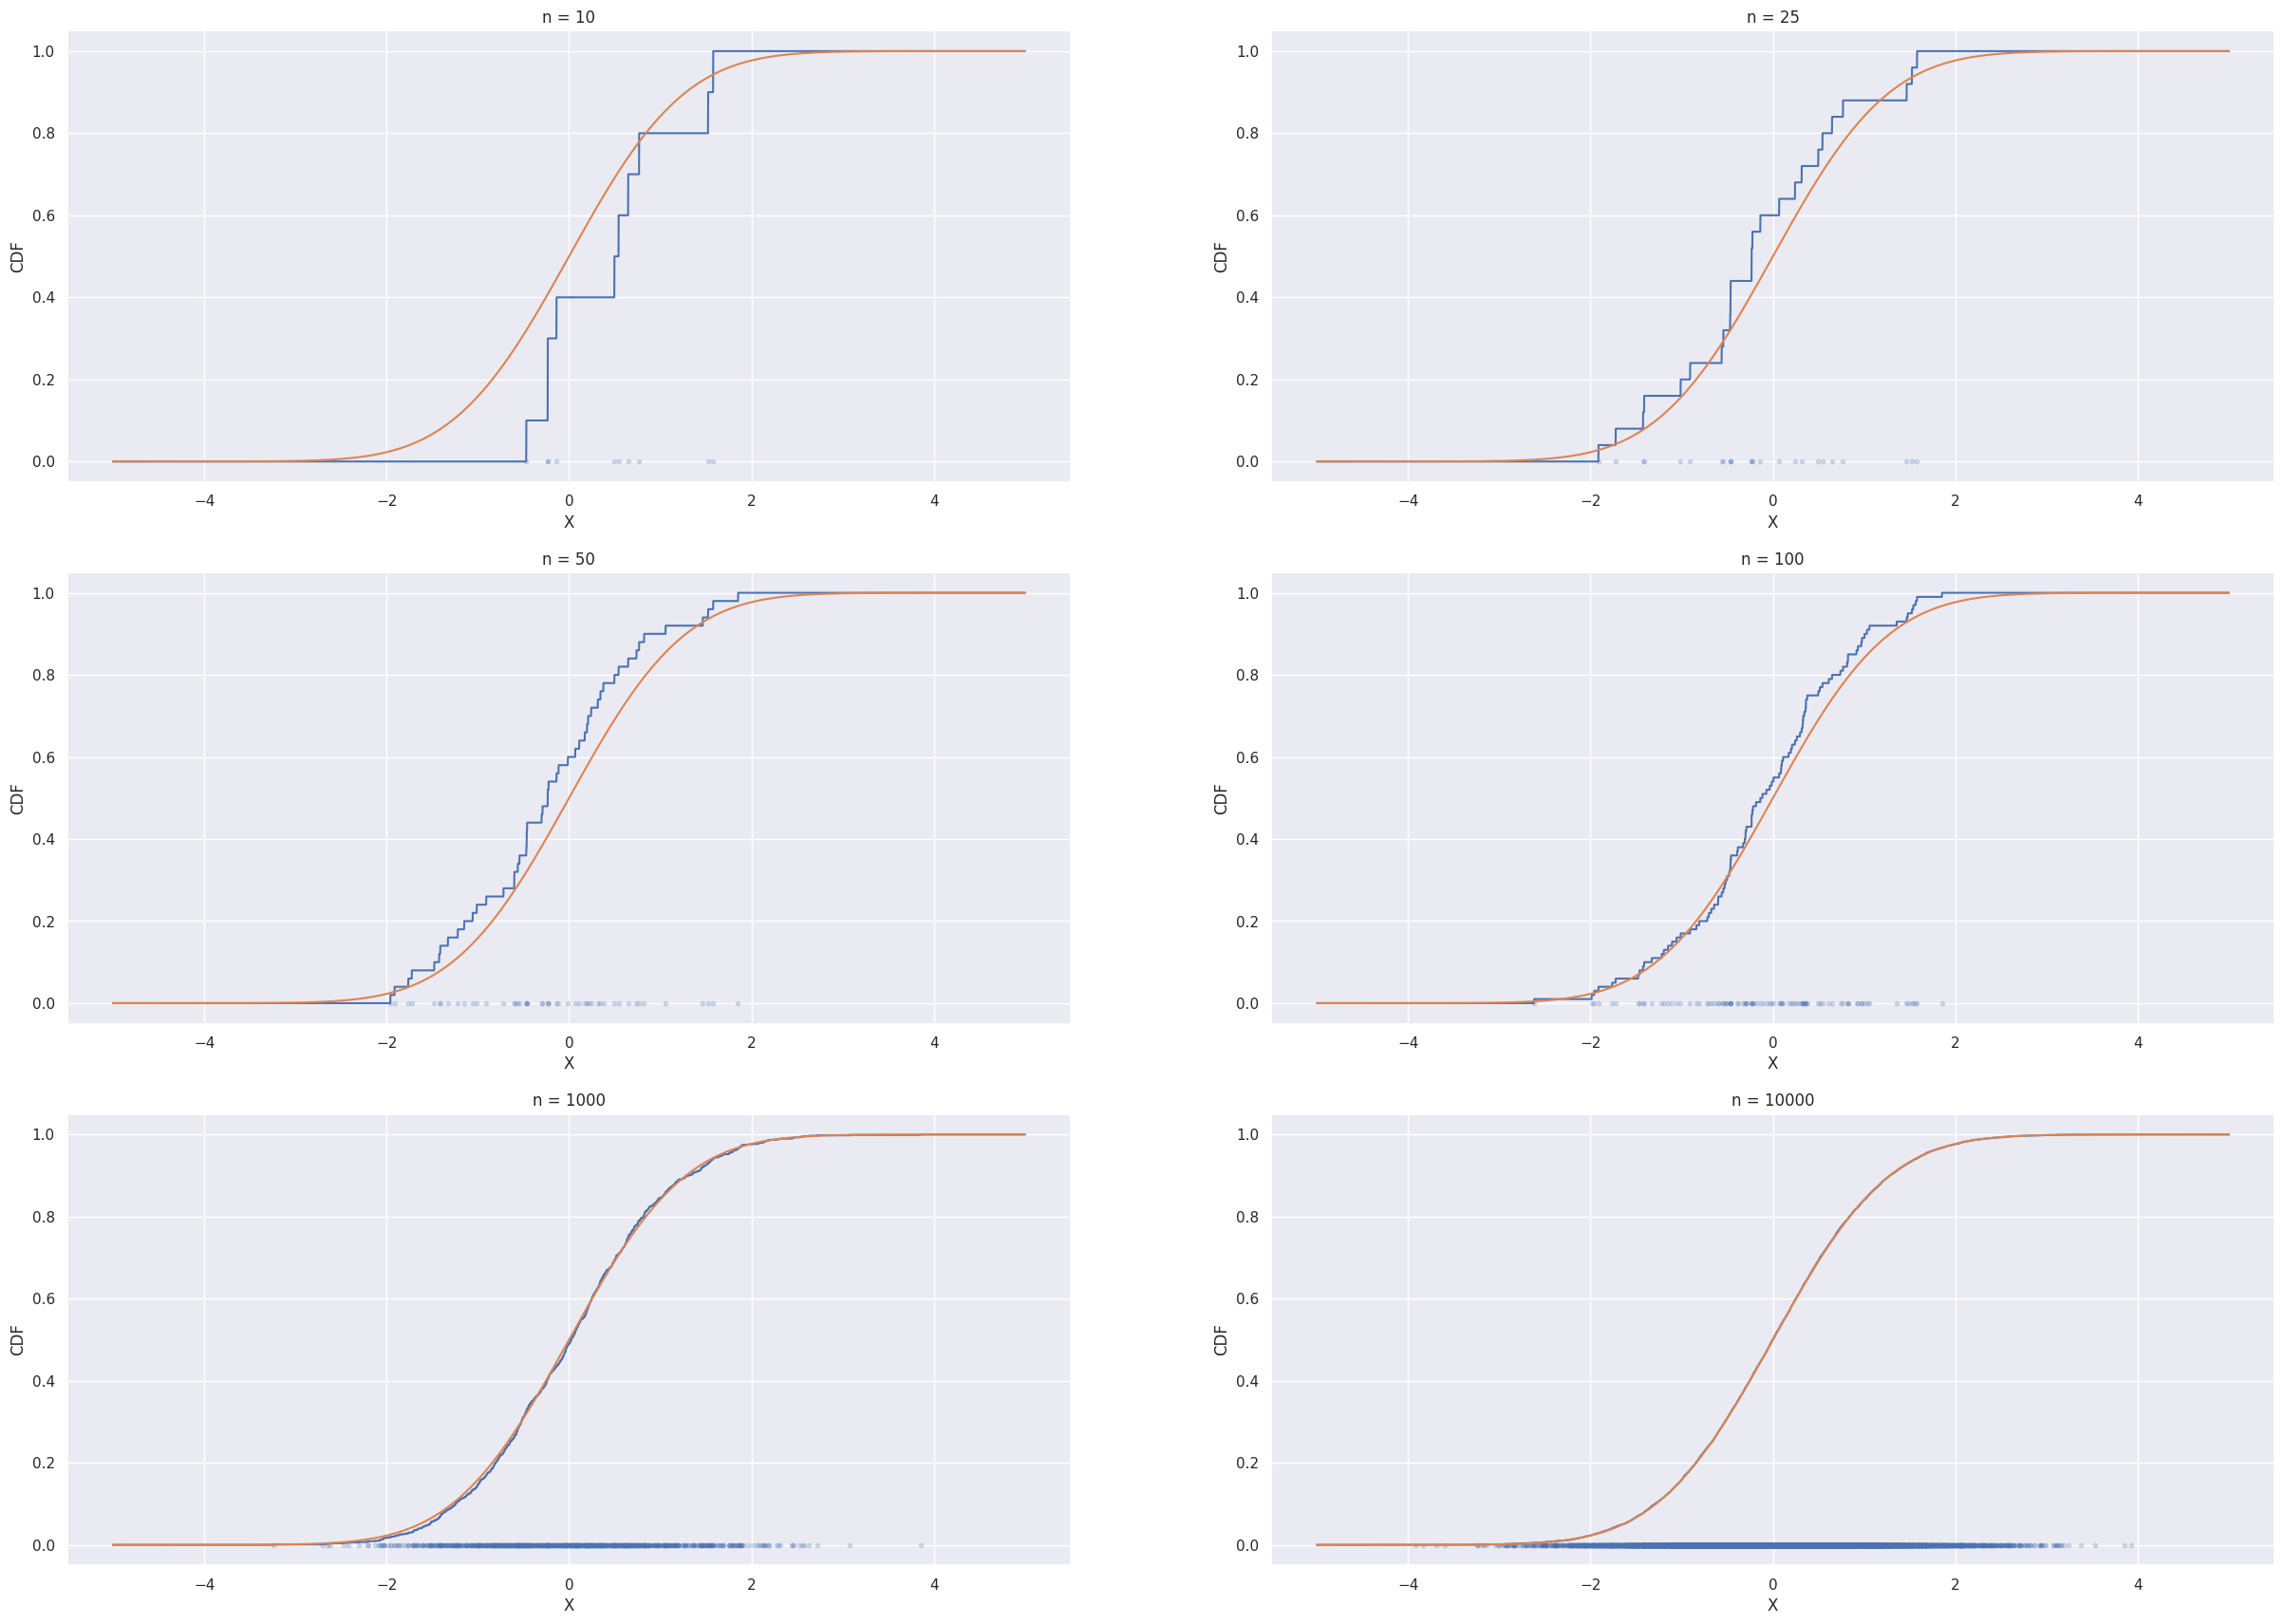

In [ ]:
rv = sps.norm(loc=0, scale=1)
sns.set_style("darkgrid")
plt.figure(figsize = (30, 21))

for n in range(len(n_array)):
  plt.subplot(3, 2, n + 1)
  plt.title(f'n = {n_array[n]}')
  plt.plot(t, ecdfs[n_array[n] - 1](t))
  plt.plot(sample[:n_array[n]], [0] * n_array[n], 'b.', alpha=0.2)
  plt.plot(t, rv.cdf(t))
  plt.xlabel('X')
  plt.ylabel('CDF')

Теорема **Гливенко-Кантелли** гласит о том, что $\displaystyle{\lim_{n->∞}\sup_{x∈R}} | \hat{F}_n(x)−F(x)| = 0$ почти наверное. На графиках видно именно это, так как при увеличении n графики истинной функции распределения и эмпирической функции распределения почти склеиваются воедино (например, при n = 10000 различие уже сложно заметить невооруженным глазом). А значит теорема выполоняется.

Для всех $n ≤ N$ посчитайте значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ для первой выборки. Промоделируйте поведение статистики $\sqrt{n}D_n$. К чему сходится распределение (на графиках)? К чему сходится в теории?


Почему нижеуказанный метод рассчета супремума верен?<br>
Заметим, что истинная функция распределения всегда возрастает (видно по предыдущим графикам). Эмпирическая функция распределения имеет конечное число значений (точнее промежутков, где она их меняет), а именно число значений = количеству точек выборки, также видно, что на графике у нас лесенка (так библиотека соединяет точки), ступеньки начинаются и заканчиваются в точках выборки и непосредственно значениях эмпирической функции распределения. Поэтому мы можем рассмотреть супремум разностей только на точках выборки.

In [ ]:
D_n = np.array([])
sample_1 = sample.copy()
for i in range(N):
  sample_1[:i].sort()
  cdf = rv.cdf(sample_1[:i + 1])

  ecdf = ecdfs[i](sample_1[:i + 1])
  D_n = np.append(D_n, np.max(np.abs(cdf - ecdf))) #Находим супремум

Text(0, 0.5, 'Значение статистик')

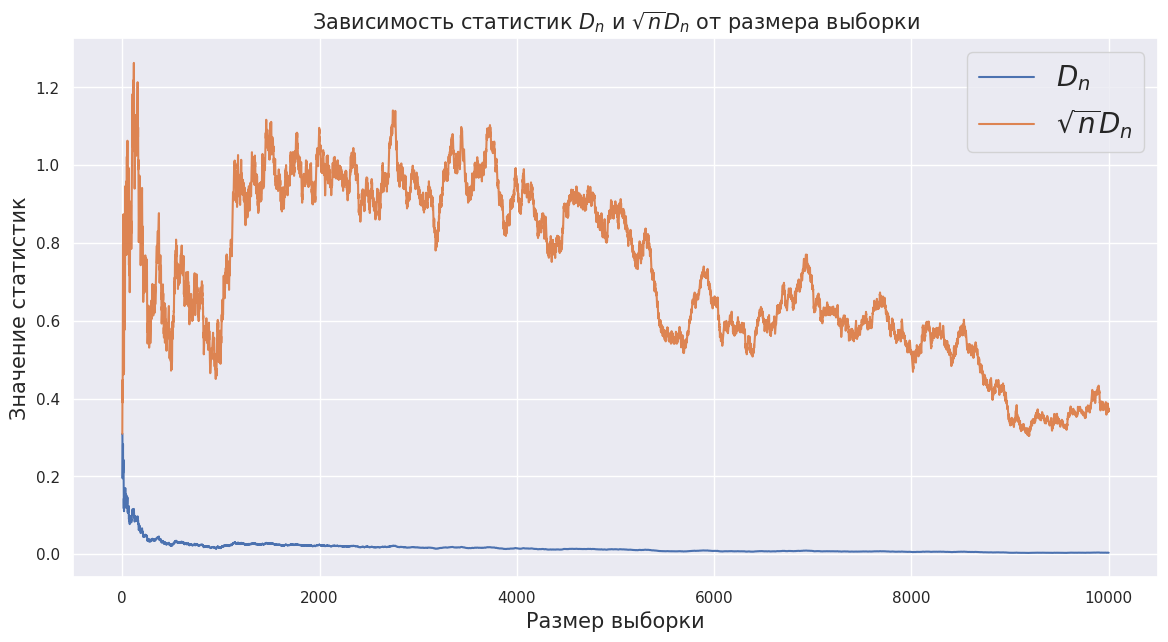

In [ ]:
# Построение графиков
sns.set_style("darkgrid")
plt.figure(figsize = (14, 7))
n_array = [(i + 1) for i in range(N)]
plt.plot(n_array, D_n, label = r'$D_n$')
plt.plot(n_array, np.sqrt(n_array) * D_n, label = r'$\sqrt{n}D_n$')
plt.legend(fontsize=20)
plt.title(r'Зависимость статистик $D_n$ и $\sqrt{n} D_n$ от размера выборки', fontsize=15)
plt.xlabel('Размер выборки', fontsize=15)
plt.ylabel('Значение статистик', fontsize=15)

**Вывод:** Заметим, что по факту мы пользовались критерием (тестом) Колмогорова-Смирнова, когда делали этот эксперимент. Видно, что $D_n$ достаточно быстро сходится к нулю, а оценка $\sqrt{n}D_N$ при больших n не превышает числа 1, а это значит, что выборка принадлежит нормальному распределению с большой точностью.<br> В теории распределение статистики Колмогорова: $∀ t > 0: \lim_{n->∞} P(\sqrt{n}D_N \leq t) = K(t) = \displaystyle{\sum_{j=-∞}^{+∞}} (-1)^j \cdot e^{-2j^2t^2} = θ_4(e^{-2t^2})$, где $θ_4$ - Тета-функция Якоби.

### Задача 5

Оказывается, нельзя оценивать распределения оценок на глаз простым всматриванием в графики! Поэтому гностики из крепости Нрон изобрели новое заклинание -- QQ-plot. В этой задаче Вам предстоит научиться проверять распределения на принадлежность семействам при помощи этого инструмента.

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Моделированием статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ изучите их распределение. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

Text(0, 0.5, 'Количество статистик')

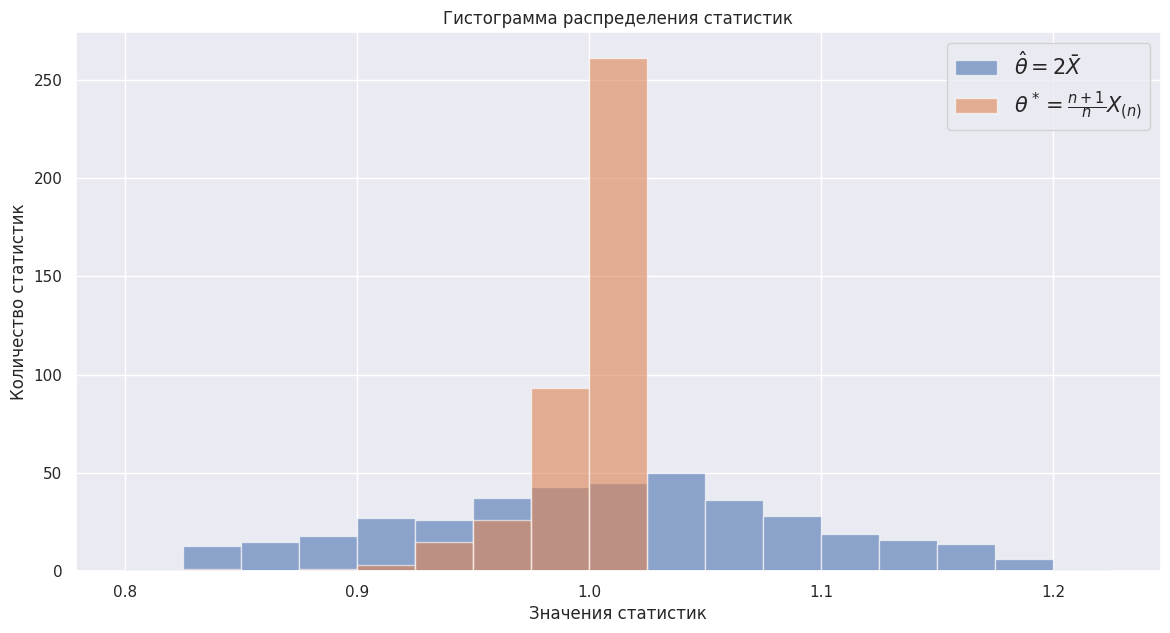

In [ ]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]
tetta = 1
samples = sps.uniform(loc=0, scale=tetta).rvs(size=(N, N_samples))
tetta_mean = 2 * samples.mean(axis = 0)
tetta_star = (N + 1) / N * (samples.max(axis = 0))

plt.figure(figsize=(14, 7))
plt.hist(tetta_mean, bins=bins, alpha=0.6, label=r'$\hat{\theta} = 2\bar{X}$')
plt.hist(tetta_star, bins=bins, alpha=0.6, label=r'$\theta^* = \frac{n + 1}{n} X_{(n)}$')
plt.legend(fontsize=15)
plt.title('Гистограмма распределения статистик')
plt.xlabel('Значения статистик')
plt.ylabel('Количество статистик')

Промоделируйте статистики $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$. К чему сходятся их распределения с ростом $N$?

In [ ]:
n = int(1e12)
tetta_1 = np.sqrt(n) * (tetta_mean - tetta) #Первая оценка
tetta_2 = 1 - n * (tetta_star - tetta) #Вторая оценка

Text(0.5, 0, 'Значения статистики')

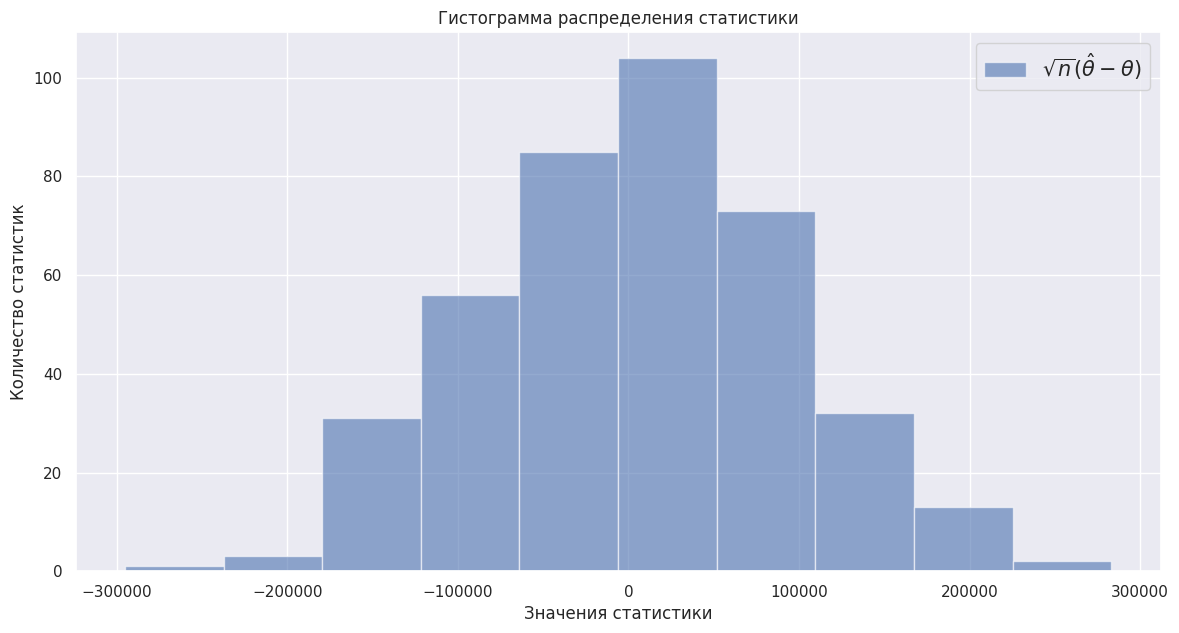

In [ ]:
plt.figure(figsize=(14, 7))
plt.hist(tetta_1, alpha=0.6, label=r'$\sqrt{n}(\hat{\theta} - \theta)$')
plt.legend(fontsize=15)
plt.title('Гистограмма распределения статистики')
plt.ylabel('Количество статистик')
plt.xlabel('Значения статистики')

Text(0.5, 0, 'Значения статистики')

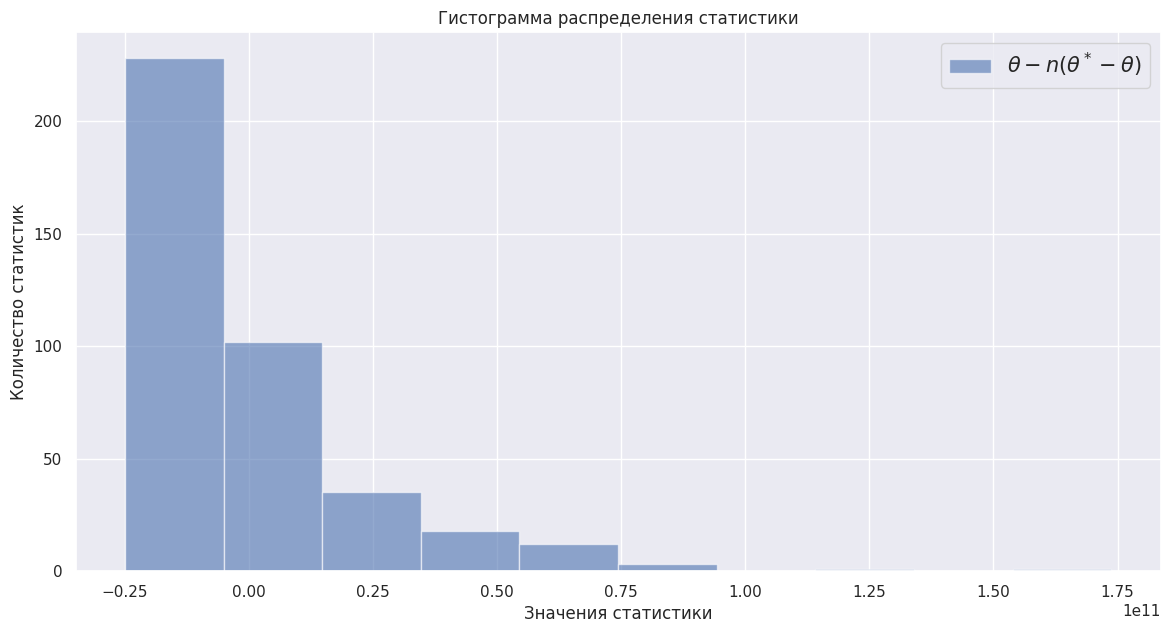

In [ ]:
plt.figure(figsize=(14, 7))
plt.hist(tetta_2, alpha=0.6, label=r'$\theta - n(\theta^*-\theta)$')
plt.legend(fontsize=15)
plt.title('Гистограмма распределения статистики')
plt.ylabel('Количество статистик')
plt.xlabel('Значения статистики')

На какие распределения похожи получившиеся гистограммы?

**Ответ:** Отвечаем сразу на два вопроса: `К чему сходятся их распределения с ростом  N ?`, `На какие распределения похожи получившиеся гистограммы?`<br>
Взяв большое N и посмотрев на получившиеся гистограммы можно увидеть, что первая оценка явно выглядит, как нормальное распределение, а вторая оценка очень похожа на экспоненциальное распределение.

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

Убирая выводы с семинара про ЦПТ и лемму Слуцкого (так как тут написано вспомнить), пишу только конец вывода: $\sqrt{n}(2\overline{X} - θ) \xrightarrow{d} N(0, 4DX_1)$, а значит $σ(θ) = 4DX_1 = 4 * \frac{θ^2}{12} = \frac{θ^2}{3}$<br>
**Ответ**: $σ(θ) = \frac{θ^2}{3}$

Посчитайте статистику
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$ для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

<Figure size 1400x700 with 0 Axes>

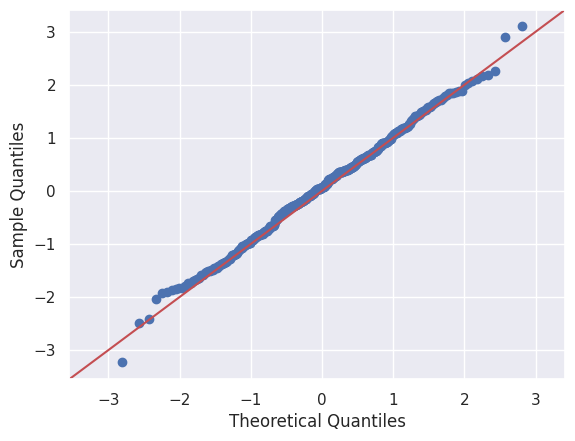

In [ ]:
import statsmodels.api as sm
theta_norm = np.sqrt(N) * (tetta_mean - tetta) / np.sqrt(tetta ** 2 / 3)
plt.figure(figsize=(14, 7))
sm.qqplot(theta_norm, line='45') #45 -> y = x
plt.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** Да, мы можем с большой точностью утверждать, что выборка взята из нормального распределения, так как она почти совпадает с прямой линией.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** Как и предполагалось, лучше всего подходит экспоненциальное распределение.

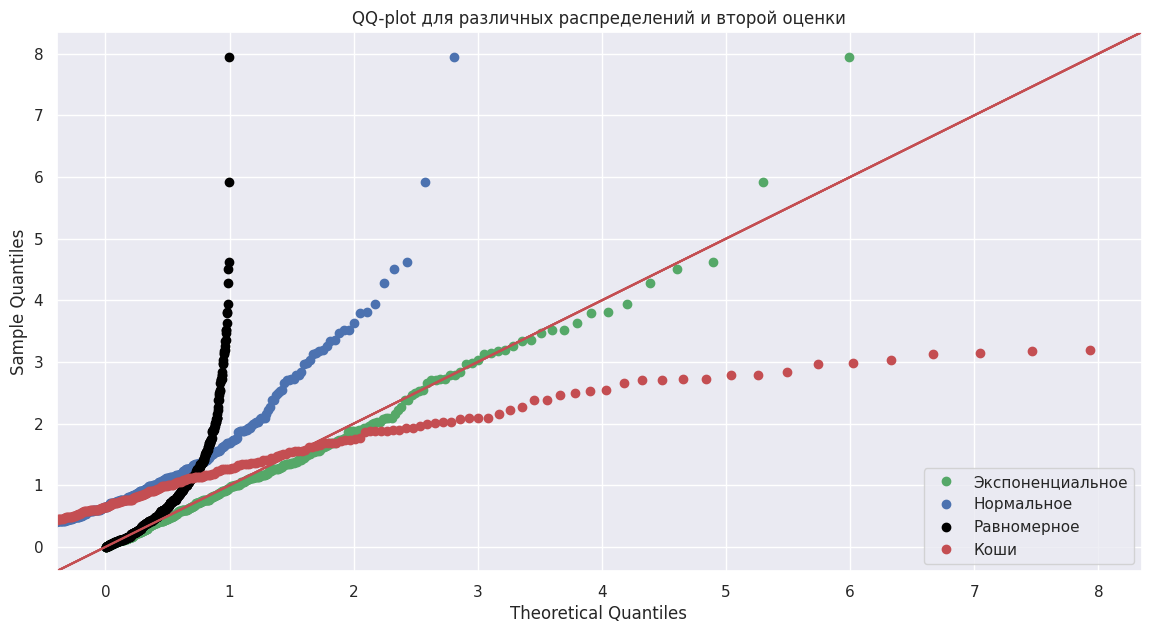

In [ ]:
tetta_2 = 1 - N * (tetta_star - tetta) #Вторая оценка
fig, ax = plt.subplots(figsize=(14, 7))

sm.qqplot(tetta_2, dist=sps.expon, ax=ax, line='45', label='Экспоненциальное', markerfacecolor='g', markeredgecolor='g')
sm.qqplot(tetta_2, dist=sps.norm, ax=ax, line='45', label='Нормальное', markerfacecolor='b', markeredgecolor='b')
sm.qqplot(tetta_2, dist=sps.uniform, ax=ax, line='45', label='Равномерное', markerfacecolor='black', markeredgecolor='black')
sm.qqplot(tetta_2, dist=sps.cauchy, ax=ax, line='45', label='Коши', markerfacecolor='r', markeredgecolor='r')
plt.title('QQ-plot для различных распределений и второй оценки')
plt.legend()
plt.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** В этом выводе мы будем пользоваться результатами, полученными в первой задаче, а именно, можно сразу сказать, что оценка $θ^*$ сходится намного быстрее, чем оценка $\hatθ$, а значит она в любом случае выгоднее. Также, исходя из результатов, которые мы получили конкретно в этом задании, можно сказать, что не асимптотическая нормальность оценки не мешает ей быть хорошей и качественно приближаться к $θ$.

# Задача 6

Эта задача проспонсирована великим магистром гнозиса Шабановым Дмитрием Александровичем. Когда-то (год назад) люди доказали, что сумма i.i.d. величин с конечной дисперсией в пределе имеет достаточно примитивное распределение.

Так как мы пока не придумали, как применить этот факт, задача предлагается к решению без веских на то причин.

В теорвере была задача, что для любого распределения с дисперсией и для любого $x$ у последовательности $P(\sum \xi_i \leq x)$ есть предел и он равен 0, 1 или 1/2. Проверьте это утверждение моделированием для хотя бы 3 распределений и 5 различных $x$. Выясните, когда предел принимает какое значение. Решите задачу (теоретически) и сформулируйте теорему о том, когда какой предел реализуется.

Важно: необходимо отыскать все три случая значения предела.

Комментарий: 5 баллов тем, кто найдёт хотя бы 2 из 3 случаев значений предела и опишет их. 10 баллов за все три случая. +5 баллов за теорему с доказательством.

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.